## Quantiataive Wirtschaftlichkeitsanalyse

In [5]:
import pandas as pd
import numpy as np
from pathlib import Path

In [ ]:
# pip install python-dotenv --break-system-packages

In [6]:
import sys

# Ensure the project src directory is on sys.path for package imports
project_root = Path.cwd()
src_path = project_root / "src"
if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))

from rewe.data import load_hitlisten_tables

In [7]:
hitlisten_tables = load_hitlisten_tables()

print(f"Loaded {len(hitlisten_tables)} tables with shared schema")
summary = pd.DataFrame(
    {
        "table": [f"Table {idx}" for idx in range(1, len(hitlisten_tables) + 1)],
        "rows": [table.shape[0] for table in hitlisten_tables],
        "columns": [table.shape[1] for table in hitlisten_tables],
    }
)
summary

Loaded 6 tables with shared schema


,table,rows,columns
0,Table 1,7,301
1,Table 2,11,301
2,Table 3,2,301
3,Table 4,2,301
4,Table 5,4,301
5,Table 6,4,301


In [13]:
# Split the first table into two tables
# Table 0: first row only
# Table 1: remaining rows (rows 1-5)
table_0 = hitlisten_tables[0].iloc[[0]]
table_1 = hitlisten_tables[0].iloc[1:]

# Update the hitlisten_tables list
# Replace the first table with the split tables
hitlisten_tables = [table_0, table_1] + hitlisten_tables[1:]

# Update summary
summary = pd.DataFrame(
    {
        "table": [f"Table {idx}" for idx in range(len(hitlisten_tables))],
        "rows": [table.shape[0] for table in hitlisten_tables],
        "columns": [table.shape[1] for table in hitlisten_tables],
    }
)
summary

,table,rows,columns
0,Table 0,1,301
1,Table 1,6,301
2,Table 2,11,301
3,Table 3,2,301
4,Table 4,2,301
5,Table 5,4,301
6,Table 6,4,301


In [22]:
print(hitlisten_tables[2].head())

                                 category  Anzahl Antworten  \
0                  Finanzen & Controlling               8.0   
1                          HR - Fachrolle              19.0   
2        IT, Daten, Analytics - Fachrolle              81.0   
3  Leitung und Geschäftsführung - Führung              12.0   
4        Logistik & Einkauf & Beschaffung               8.0   

   Fr.1 - Antwortentwürfe, Formulierungshilfen  \
0                                          7.0   
1                                         15.0   
2                                         72.0   
3                                         11.0   
4                                          8.0   

   Fr.1 - Textentwürfe aus Stichpunkten generieren  \
0                                              7.0   
1                                             15.0   
2                                             57.0   
3                                              8.0   
4                                              8.0

### Transformation von Table 2 - Gruppenanalyse

In [23]:
# Transponiere Table 2 analog zu Table 0
table_2 = hitlisten_tables[2]

# Transponiere und bereite die Daten vor
table_2_transposed = table_2.T

# Reset index to make the current index a column
table_2_transposed = table_2_transposed.reset_index()

# Benenne die Spalten basierend auf den Gruppennamen (erste Zeile)
# Die erste Zeile enthält die Gruppennamen
group_names = table_2_transposed.iloc[0, 1:].tolist()
print("Erkannte Gruppen:")
for i, group in enumerate(group_names):
    print(f"  Gruppe {i+1}: {group}")

# Erstelle neue Spaltenstruktur
# Erste Spalte ist 'Question', dann die Gruppennamen
new_columns = ['Question'] + group_names
table_2_transposed.columns = new_columns

# Entferne die erste Zeile (die Gruppennamen)
table_2_transposed = table_2_transposed.drop(0).reset_index(drop=True)

# Zeige die Struktur
print(f"\nAnzahl Zeilen: {len(table_2_transposed)}")
print(f"Anzahl Gruppen: {len(group_names)}")
print(f"\nErste Zeilen:")
table_2_transposed.head(10)

Erkannte Gruppen:
  Gruppe 1: Finanzen & Controlling
  Gruppe 2: HR - Fachrolle
  Gruppe 3: IT, Daten, Analytics - Fachrolle
  Gruppe 4: Leitung und Geschäftsführung - Führung
  Gruppe 5: Logistik & Einkauf & Beschaffung
  Gruppe 6: Produktmanagement & Agile
  Gruppe 7: Produktmanagement & Agile - Projekt-, 
Programmleitung, Koordination und PMO
  Gruppe 8: Sonstiges - Fachrolle
  Gruppe 9: Sonstiges - Führung
  Gruppe 10: Sonstiges - Projekt-, Programmleitung, 
Koordination und PMO
  Gruppe 11: Vertrieb

Anzahl Zeilen: 300
Anzahl Gruppen: 11

Erste Zeilen:


,Question,Finanzen & Controlling,HR - Fachrolle,"IT, Daten, Analytics - Fachrolle",Leitung und Geschäftsführung - Führung,Logistik & Einkauf & Beschaffung,Produktmanagement & Agile,"Produktmanagement & Agile - Projekt-, \nProgrammleitung, Koordination und PMO",Sonstiges - Fachrolle,Sonstiges - Führung,"Sonstiges - Projekt-, Programmleitung, \nKoordination und PMO",Vertrieb
0,Anzahl Antworten,8.0,19.0,81.0,12.0,8.0,6.0,36.0,89.0,62.0,24.0,10.0
1,"Fr.1 - Antwortentwürfe, Formulierungshilfen",7.0,15.0,72.0,11.0,8.0,5.0,28.0,75.0,53.0,21.0,10.0
2,Fr.1 - Textentwürfe aus Stichpunkten generieren,7.0,15.0,57.0,8.0,8.0,6.0,24.0,64.0,43.0,18.0,7.0
3,Fr.1 - Umformulieren / Tonalität anpassen,6.0,11.0,55.0,11.0,8.0,5.0,25.0,67.0,45.0,19.0,8.0
4,Fr.1 - Korrekturlesen,3.0,7.0,40.0,3.0,5.0,3.0,13.0,43.0,25.0,10.0,6.0
5,Fr.1 - Übersetzen,3.0,4.0,47.0,5.0,6.0,4.0,16.0,41.0,23.0,13.0,4.0
6,Fr.1 - Präsentationstexte / ModerationsNotizen...,2.0,9.0,36.0,3.0,4.0,4.0,13.0,34.0,28.0,12.0,4.0
7,Fr.1 - Zusammenfassung langer E-MailThreads,4.0,11.0,44.0,9.0,6.0,4.0,19.0,40.0,40.0,18.0,6.0
8,Fr.1 - Chat-/KanalZusammenfassungen,2.0,8.0,34.0,4.0,NaN,3.0,14.0,25.0,22.0,10.0,3.0
9,Fr.1 - Zusammenfassungen aus Texten &/ Dateien...,8.0,11.0,51.0,8.0,7.0,6.0,21.0,59.0,46.0,17.0,8.0


In [24]:
# Analysiere die Gruppengrößen
print("="*80)
print("ANALYSE DER GRUPPENGRÖSSEN")
print("="*80)

# Erste Zeile sollte die Gesamtzahl der Antworten pro Gruppe enthalten
# Suche nach einer Zeile mit "Anzahl" oder "Total" oder nehme die erste Datenzeile
first_data_row = table_2_transposed.iloc[0]

group_sizes = {}
for group in group_names:
    value = first_data_row[group]
    # Konvertiere zu numerisch
    try:
        size = float(value)
        group_sizes[group] = int(size)
    except:
        group_sizes[group] = None

# Sortiere nach Größe
sorted_groups = sorted(group_sizes.items(), key=lambda x: x[1] if x[1] is not None else 0, reverse=True)

print(f"\nGruppengröße (Anzahl Antworten):")
print("-" * 80)
total_responses = 0
for group, size in sorted_groups:
    if size is not None:
        print(f"  {group:60s}: {size:4d}")
        total_responses += size
    else:
        print(f"  {group:60s}: N/A")

print(f"\n{'Gesamt:':60s}  {total_responses:4d}")

# Berechne Anteile
print(f"\n\nGruppenanteil (%):")
print("-" * 80)
for group, size in sorted_groups:
    if size is not None and total_responses > 0:
        percent = (size / total_responses) * 100
        print(f"  {group:60s}: {percent:5.1f}%")

# Identifiziere kleine Gruppen (< 30 Antworten)
print("\n" + "="*80)
print("IDENTIFIKATION KLEINER GRUPPEN (n < 30)")
print("="*80)
small_groups = [(g, s) for g, s in group_sizes.items() if s is not None and s < 30]
if small_groups:
    for group, size in small_groups:
        print(f"  ⚠ {group:60s}: n = {size}")
    print(f"\n  Anzahl kleiner Gruppen: {len(small_groups)} von {len(group_sizes)}")
else:
    print("  ✓ Keine Gruppen mit n < 30 gefunden")

ANALYSE DER GRUPPENGRÖSSEN

Gruppengröße (Anzahl Antworten):
--------------------------------------------------------------------------------
  Sonstiges - Fachrolle                                       :   89
  IT, Daten, Analytics - Fachrolle                            :   81
  Sonstiges - Führung                                         :   62
  Produktmanagement & Agile - Projekt-, 
Programmleitung, Koordination und PMO:   36
  Sonstiges - Projekt-, Programmleitung, 
Koordination und PMO:   24
  HR - Fachrolle                                              :   19
  Leitung und Geschäftsführung - Führung                      :   12
  Vertrieb                                                    :   10
  Finanzen & Controlling                                      :    8
  Logistik & Einkauf & Beschaffung                            :    8
  Produktmanagement & Agile                                   :    6

Gesamt:                                                        355


Gruppenanteil

### Empfehlungen für die Analyse kleiner Gruppen

Bei kleinen Gruppengrößen (n < 30) sind spezielle statistische Ansätze erforderlich:

#### 1. **Deskriptive Statistik**
- Fokus auf Median statt Mittelwert (robuster gegenüber Ausreißern)
- Quartile und Interquartilsabstände (IQR) statt Standardabweichung
- Visualisierung mit Boxplots statt Histogrammen

#### 2. **Gruppenzusammenlegung (Empfohlen)**
- **Thematische Aggregation**: Ähnliche Gruppen zusammenfassen
  - z.B. alle "Sonstiges"-Kategorien
  - z.B. alle "Führung"-Rollen
  - z.B. alle "Fachrolle"-Positionen
- **Hierarchische Gruppierung**: Übergeordnete Kategorien bilden

#### 3. **Nicht-parametrische Tests**
- Kruskal-Wallis Test (statt ANOVA) für Gruppenvergleiche
- Mann-Whitney U-Test (statt t-Test) für Paarvergleiche
- Bootstrap-Methoden für Konfidenzintervalle

#### 4. **Effektgrößen statt p-Werte**
- Cohen's d für Mittelwertsvergleiche
- Cliff's Delta für ordinale Daten
- Aussagekraft trotz geringer Power

#### 5. **Qualitative Ergänzung**
- Detaillierte Einzelfallanalyse
- Pattern-Erkennung statt statistische Signifikanz
- Explorative Datenanalyse (EDA)

#### 6. **Vorsichtige Interpretation**
- Keine Generalisierung auf Gesamtpopulation
- Konfidenzintervalle berichten
- Effektgrößen priorisieren

In [25]:
# FINALE ÜBERARBEITETE Gruppenzusammenlegung
print("="*80)
print("FINALE AGGREGIERTE GRUPPENSTRUKTUR")
print("="*80)
print("\nStrategie:")
print("1. Sonstige, Projekt und Programmleitung → Produktmanagement")
print("2. Sonstige (Fach & Projekt) + alle kleine Gruppen → Restgruppe")
print()

# SCHRITT 1: Erste Aggregation (thematisch sinnvoll)
aggregation_mapping_step1 = {
    # IT & Daten
    'IT, Daten, Analytics - Fachrolle': 'IT & Daten',
    
    # Führung (aggregiert)
    'Leitung und Geschäftsführung - Führung': 'Führung (alle)',
    'Sonstiges - Führung': 'Führung (alle)',
    
    # Produktmanagement & Agile (ERWEITERT: inkl. Sonstige Projekt/Programmleitung)
    'Produktmanagement & Agile': 'Produktmanagement & Agile (alle)',
    'Produktmanagement & Agile - Projekt-, \nProgrammleitung, Koordination und PMO': 'Produktmanagement & Agile (alle)',
    'Sonstiges - Projekt-, Programmleitung, \nKoordination und PMO': 'Produktmanagement & Agile (alle)',  # NEU hinzugefügt!
    
    # Sonstige Fachrolle → wird später zur Restgruppe
    'Sonstiges - Fachrolle': 'Sonstige (Fach)',
    
    # Einzelne kleine Gruppen (werden später zur Restgruppe)
    'HR - Fachrolle': 'HR',
    'Finanzen & Controlling': 'Finanzen & Controlling',
    'Logistik & Einkauf & Beschaffung': 'Logistik & Einkauf',
    'Vertrieb': 'Vertrieb'
}

# Berechne Größen nach erster Aggregation
temp_groups = {}
for original_group, aggregated_name in aggregation_mapping_step1.items():
    if original_group in group_sizes and group_sizes[original_group] is not None:
        size = group_sizes[original_group]
        if aggregated_name in temp_groups:
            temp_groups[aggregated_name] += size
        else:
            temp_groups[aggregated_name] = size

print("\nZwischenschritt (nach thematischer Aggregation):")
print("-" * 80)
for group_name, size in sorted(temp_groups.items(), key=lambda x: x[1], reverse=True):
    print(f"  {group_name:45s}: n = {size:4d}")

# SCHRITT 2: Finale Aggregation
# Gruppen die eigenständig bleiben (n ≥ 30)
aggregated_groups = {
    'IT & Daten': temp_groups.get('IT & Daten', 0),
    'Führung (alle)': temp_groups.get('Führung (alle)', 0),
    'Produktmanagement & Agile (alle)': temp_groups.get('Produktmanagement & Agile (alle)', 0)
}

# RESTGRUPPE: Sonstige (Fach) + alle anderen kleinen Gruppen
restgruppe_components = []
restgruppe_size = 0

# Definiere was zur Restgruppe gehört
restgruppe_sources = ['Sonstige (Fach)', 'HR', 'Finanzen & Controlling', 
                      'Logistik & Einkauf', 'Vertrieb']

for group_name in restgruppe_sources:
    if group_name in temp_groups:
        size = temp_groups[group_name]
        restgruppe_size += size
        restgruppe_components.append(f"{group_name} (n={size})")

# Füge Restgruppe hinzu
aggregated_groups['Restgruppe (Sonstige & kleine Gruppen)'] = restgruppe_size

# Sortiere nach Größe
sorted_agg_groups = sorted(aggregated_groups.items(), key=lambda x: x[1], reverse=True)

print("\n" + "="*80)
print("FINALE AGGREGIERTE GRUPPEN")
print("="*80)
total_agg = 0
for group, size in sorted_agg_groups:
    marker = "✓" if size >= 30 else "⚠"
    print(f"{marker} {group:45s}: n = {size:4d} ({(size/sum(aggregated_groups.values()))*100:5.1f}%)")
    total_agg += size

print(f"\n{'Gesamt:':47s}  n = {total_agg:4d}")

# Zeige Zusammensetzung der Restgruppe
print("\n" + "="*80)
print("ZUSAMMENSETZUNG DER RESTGRUPPE")
print("="*80)
print(f"\nDie Restgruppe (n={restgruppe_size}) setzt sich zusammen aus:")
for component in restgruppe_components:
    print(f"  • {component}")

# Überprüfung
print("\n" + "="*80)
print("QUALITÄTSPRÜFUNG")
print("="*80)
small_agg_groups = [(g, s) for g, s in aggregated_groups.items() if s < 30]
if small_agg_groups:
    print("\n⚠ Noch immer kleine Gruppen (n < 30):")
    for group, size in small_agg_groups:
        print(f"  {group:45s}: n = {size}")
else:
    print("\n✓ Alle aggregierten Gruppen haben n ≥ 30")
    
print(f"\nAnzahl ursprünglicher Gruppen: {len(group_sizes)}")
print(f"Anzahl finaler Gruppen:        {len(aggregated_groups)}")
print(f"Reduktion:                     {len(group_sizes) - len(aggregated_groups)} Gruppen")
print("\n" + "="*80)

FINALE AGGREGIERTE GRUPPENSTRUKTUR

Strategie:
1. Sonstige, Projekt und Programmleitung → Produktmanagement
2. Sonstige (Fach & Projekt) + alle kleine Gruppen → Restgruppe


Zwischenschritt (nach thematischer Aggregation):
--------------------------------------------------------------------------------
  Sonstige (Fach)                              : n =   89
  IT & Daten                                   : n =   81
  Führung (alle)                               : n =   74
  Produktmanagement & Agile (alle)             : n =   66
  HR                                           : n =   19
  Vertrieb                                     : n =   10
  Finanzen & Controlling                       : n =    8
  Logistik & Einkauf                           : n =    8

FINALE AGGREGIERTE GRUPPEN
✓ Restgruppe (Sonstige & kleine Gruppen)       : n =  134 ( 37.7%)
✓ IT & Daten                                   : n =   81 ( 22.8%)
✓ Führung (alle)                               : n =   74 ( 20.8%)
✓ P

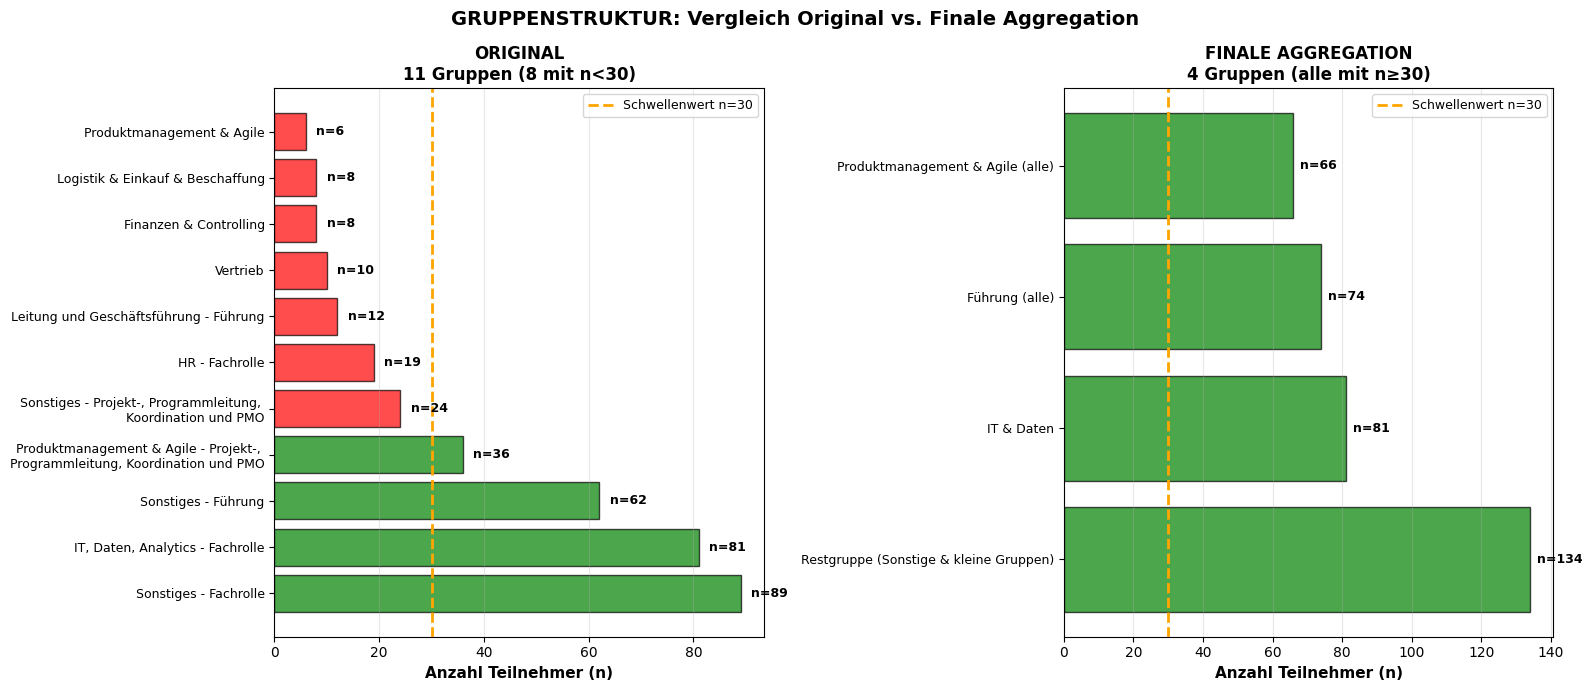


VERGLEICH: ORIGINAL vs. FINALE AGGREGATION

ORIGINAL:
  Anzahl Gruppen:              11
  Gruppen mit n < 30:          7 (64%)
  Gruppen mit n ≥ 30:          4 (36%)
  Kleinste Gruppe:             n = 6
  Größte Gruppe:               n = 89

FINALE AGGREGATION:
  Anzahl Gruppen:              4
  Gruppen mit n < 30:          0 (0%)
  Gruppen mit n ≥ 30:          4 (100%)
  Kleinste Gruppe:             n = 66
  Größte Gruppe:               n = 134

✓ VERBESSERUNG: 7 Gruppen wurden auf n≥30 gebracht!


In [27]:
# VISUALISIERUNG: Original vs. Finale Aggregation
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Originale Gruppen (sortiert nach Größe)
sorted_original = sorted([(g, s) for g, s in group_sizes.items() if s is not None], 
                         key=lambda x: x[1], reverse=True)
original_names = [g for g, _ in sorted_original]
original_sizes = [s for _, s in sorted_original]

# Farben für originale Gruppen (rot wenn n<30, grün wenn n≥30)
colors_orig = ['red' if s < 30 else 'green' for s in original_sizes]

# Subplot 1: Originale Gruppen
ax1 = axes[0]
bars1 = ax1.barh(range(len(original_names)), original_sizes, color=colors_orig, alpha=0.7, edgecolor='black')
ax1.set_yticks(range(len(original_names)))
ax1.set_yticklabels(original_names, fontsize=9)
ax1.set_xlabel('Anzahl Teilnehmer (n)', fontsize=11, fontweight='bold')
ax1.set_title('ORIGINAL\n11 Gruppen (8 mit n<30)', fontsize=12, fontweight='bold')
ax1.axvline(x=30, color='orange', linestyle='--', linewidth=2, label='Schwellenwert n=30')
ax1.legend(fontsize=9)
ax1.grid(axis='x', alpha=0.3)

# Füge Werte hinzu
for i, (bar, val) in enumerate(zip(bars1, original_sizes)):
    ax1.text(val + 2, bar.get_y() + bar.get_height()/2, 
             f'n={val}', va='center', fontsize=9, fontweight='bold')

# Subplot 2: Aggregierte Gruppen
sorted_agg = sorted(aggregated_groups.items(), key=lambda x: x[1], reverse=True)
agg_names = [g for g, _ in sorted_agg]
agg_sizes = [s for _, s in sorted_agg]

# Farben für aggregierte Gruppen
colors_agg = []
for name, size in sorted_agg:
    if 'Restgruppe' in name:
        colors_agg.append('green')
    elif size >= 30:
        colors_agg.append('green')
    else:
        colors_agg.append('red')

ax2 = axes[1]
bars2 = ax2.barh(range(len(agg_names)), agg_sizes, color=colors_agg, alpha=0.7, edgecolor='black')
ax2.set_yticks(range(len(agg_names)))
ax2.set_yticklabels(agg_names, fontsize=9)
ax2.set_xlabel('Anzahl Teilnehmer (n)', fontsize=11, fontweight='bold')
ax2.set_title('FINALE AGGREGATION\n4 Gruppen (alle mit n≥30)', fontsize=12, fontweight='bold')
ax2.axvline(x=30, color='orange', linestyle='--', linewidth=2, label='Schwellenwert n=30')
ax2.legend(fontsize=9)
ax2.grid(axis='x', alpha=0.3)

# Füge Werte hinzu
for i, (bar, val) in enumerate(zip(bars2, agg_sizes)):
    ax2.text(val + 2, bar.get_y() + bar.get_height()/2, 
             f'n={val}', va='center', fontsize=9, fontweight='bold')

plt.suptitle('GRUPPENSTRUKTUR: Vergleich Original vs. Finale Aggregation', 
             fontsize=14, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Zusammenfassende Statistik
print("\n" + "="*80)
print("VERGLEICH: ORIGINAL vs. FINALE AGGREGATION")
print("="*80)

small_groups = [s for s in original_sizes if s < 30]
print(f"\nORIGINAL:")
print(f"  Anzahl Gruppen:              {len(original_sizes)}")
print(f"  Gruppen mit n < 30:          {len(small_groups)} ({len(small_groups)/len(original_sizes)*100:.0f}%)")
print(f"  Gruppen mit n ≥ 30:          {len(original_sizes) - len(small_groups)} ({(len(original_sizes) - len(small_groups))/len(original_sizes)*100:.0f}%)")
print(f"  Kleinste Gruppe:             n = {min(original_sizes)}")
print(f"  Größte Gruppe:               n = {max(original_sizes)}")

small_agg = [s for s in agg_sizes if s < 30]
print(f"\nFINALE AGGREGATION:")
print(f"  Anzahl Gruppen:              {len(agg_sizes)}")
print(f"  Gruppen mit n < 30:          {len(small_agg)} ({len(small_agg)/len(agg_sizes)*100:.0f}%)")
print(f"  Gruppen mit n ≥ 30:          {len(agg_sizes) - len(small_agg)} ({(len(agg_sizes) - len(small_agg))/len(agg_sizes)*100:.0f}%)")
print(f"  Kleinste Gruppe:             n = {min(agg_sizes)}")
print(f"  Größte Gruppe:               n = {max(agg_sizes)}")

print(f"\n✓ VERBESSERUNG: {len(small_groups) - len(small_agg)} Gruppen wurden auf n≥30 gebracht!")
print("="*80)

### Konkrete Empfehlungen für signifikante Analysen mit kleinen Gruppen

#### ✅ **EMPFOHLENE VORGEHENSWEISE**

**1. Zwei-Ebenen-Analyse-Strategie:**
   - **Ebene 1**: Aggregierte Gruppen (n≥30) für robuste Inferenzstatistik
   - **Ebene 2**: Original-Gruppen für deskriptive Exploration

**2. Für große Gruppen (n≥30): IT & Daten, Führung, Sonstige, Produktmanagement**
   - ✓ Parametrische Tests (t-Test, ANOVA)
   - ✓ Konfidenzintervalle berechnen
   - ✓ Regression und multivariate Analysen
   - ✓ Generalisierung auf Population möglich

**3. Für mittlere Gruppen (20≤n<30): HR**
   - ⚠ Nicht-parametrische Tests bevorzugen (Mann-Whitney U, Kruskal-Wallis)
   - ⚠ Bootstrap-Konfidenzintervalle verwenden
   - ⚠ Effektgrößen statt p-Werte berichten
   - ⚠ Vorsichtige Interpretation

**4. Für kleine Gruppen (n<20): Finanzen, Logistik, Vertrieb**
   - ❌ KEINE Inferenzstatistik empfohlen
   - ✓ Rein deskriptive Statistik
   - ✓ Median, Quartile, Range
   - ✓ Individuelle Falldarstellung
   - ✓ Qualitative Insights

#### 📊 **KONKRETE TESTS FÜR GRUPPENVERGLEICHE**

**Hypothese: "Unterscheiden sich die Gruppen in ihrer Copilot-Nutzung?"**

| Methode | Anwendung | Mindest-n |
|---------|-----------|-----------|
| One-Way ANOVA | Vergleich aller aggregierten Gruppen | n≥30 pro Gruppe |
| Kruskal-Wallis | Nicht-parametrische Alternative | n≥20 pro Gruppe |
| Post-hoc Tests | Paarweise Vergleiche nach ANOVA | n≥30 pro Gruppe |
| Mann-Whitney U | Zwei-Gruppen-Vergleich | n≥20 pro Gruppe |
| Permutation Tests | Verteilungsfreie Tests | n≥10 pro Gruppe |
| Bootstrap CI | Konfidenzintervalle | beliebig |

#### 🎯 **EMPFOHLENE ANALYSE-PIPELINE**

```
1. Deskriptive Statistik für ALLE Gruppen
   → Median, IQR, Min, Max, Verteilungsplots
   
2. Inferenzstatistik nur für aggregierte Gruppen
   → Kruskal-Wallis Test: Unterschiede zwischen Gruppen?
   → Post-hoc Tests: Welche Gruppen unterscheiden sich?
   
3. Effektgrößen berechnen
   → Cohen's d oder Cliff's Delta
   → Praktische Relevanz der Unterschiede
   
4. Visualisierung
   → Boxplots mit Einzelwerten für kleine Gruppen
   → Violin Plots für größere Gruppen
   
5. Interpretation mit Vorsicht
   → Kleine Gruppen: Trends, keine Signifikanz
   → Große Gruppen: Statistische Tests
```

In [1]:
# STATISTISCHE POWER-ANALYSE FÜR FINALE GRUPPEN
from scipy import stats
import numpy as np

def calculate_approximate_power(n, effect_size=0.5, alpha=0.05):
    """
    Approximative Power-Berechnung für t-Tests
    
    Parameters:
    -----------
    n : int
        Stichprobengröße
    effect_size : float
        Cohen's d (0.2=klein, 0.5=mittel, 0.8=groß)
    alpha : float
        Signifikanzniveau
    
    Returns:
    --------
    power : float
        Statistische Power (zwischen 0 und 1)
    """
    # Kritischer Wert für zweiseitigen Test
    z_alpha = stats.norm.ppf(1 - alpha/2)
    
    # Non-centrality parameter
    delta = effect_size * np.sqrt(n/2)
    
    # Power berechnen
    power = 1 - stats.norm.cdf(z_alpha - delta) + stats.norm.cdf(-z_alpha - delta)
    
    return power

print("="*80)
print("POWER-ANALYSE FÜR FINALE GRUPPENSTRUKTUR")
print("="*80)
print("\nAnnahmen:")
print("  • Effektstärke (Cohen's d):  0.5 (mittlerer Effekt)")
print("  • Signifikanzniveau (α):     0.05")
print("  • Test-Typ:                  Zweiseitiger t-Test")
print()
print("Interpretation:")
print("  Power ≥ 0.80:  Sehr gut - hohe Wahrscheinlichkeit, echte Effekte zu finden")
print("  Power ≥ 0.60:  Akzeptabel - moderate Wahrscheinlichkeit")
print("  Power < 0.60:  Unzureichend - hohes Risiko für Typ-II-Fehler")
print()

print("-" * 80)
print(f"{'Gruppe':<45s} {'n':>5s} {'Power':>8s} {'Bewertung':<20s}")
print("-" * 80)

for group_name, size in sorted(aggregated_groups.items(), key=lambda x: x[1], reverse=True):
    power = calculate_approximate_power(size, effect_size=0.5, alpha=0.05)
    
    # Bewertung
    if power >= 0.80:
        rating = "✓ Sehr gut"
        marker = "✓"
    elif power >= 0.60:
        rating = "○ Akzeptabel"
        marker = "○"
    else:
        rating = "✗ Unzureichend"
        marker = "✗"
    
    print(f"{marker} {group_name:<43s} {size:>5d} {power:>7.1%} {rating:<20s}")

print("-" * 80)

# Zusammenfassung
powers = [calculate_approximate_power(s) for s in aggregated_groups.values()]
avg_power = np.mean(powers)
min_power = min(powers)
max_power = max(powers)

print(f"\nZUSAMMENFASSUNG:")
print(f"  Durchschnittliche Power:  {avg_power:.1%}")
print(f"  Minimale Power:           {min_power:.1%}")
print(f"  Maximale Power:           {max_power:.1%}")

# Empfehlungen
print("\n" + "="*80)
print("EMPFEHLUNGEN FÜR STATISTISCHE ANALYSEN")
print("="*80)

very_good = sum(1 for p in powers if p >= 0.80)
acceptable = sum(1 for p in powers if 0.60 <= p < 0.80)
insufficient = sum(1 for p in powers if p < 0.60)

print(f"\n✓ {very_good}/{len(aggregated_groups)} Gruppen mit sehr guter Power (≥80%)")
print(f"○ {acceptable}/{len(aggregated_groups)} Gruppen mit akzeptabler Power (60-79%)")
print(f"✗ {insufficient}/{len(aggregated_groups)} Gruppen mit unzureichender Power (<60%)")

if insufficient == 0:
    print("\n🎉 HERVORRAGEND! Alle Gruppen haben ausreichende Power für robuste Analysen.")
    print("\nMögliche Analysen:")
    print("  1. Kruskal-Wallis-Test (nicht-parametrisch)")
    print("  2. ANOVA (falls Normalverteilung gegeben)")
    print("  3. Post-hoc pairweise Vergleiche")
    print("  4. Effektstärken-Analysen")
else:
    print(f"\n⚠ ACHTUNG: {insufficient} Gruppe(n) haben unzureichende Power.")
    print("  Empfehlung: Weitere Aggregation oder nur deskriptive Statistik")

print("="*80)

POWER-ANALYSE FÜR FINALE GRUPPENSTRUKTUR

Annahmen:
  • Effektstärke (Cohen's d):  0.5 (mittlerer Effekt)
  • Signifikanzniveau (α):     0.05
  • Test-Typ:                  Zweiseitiger t-Test

Interpretation:
  Power ≥ 0.80:  Sehr gut - hohe Wahrscheinlichkeit, echte Effekte zu finden
  Power ≥ 0.60:  Akzeptabel - moderate Wahrscheinlichkeit
  Power < 0.60:  Unzureichend - hohes Risiko für Typ-II-Fehler

--------------------------------------------------------------------------------
Gruppe                                            n    Power Bewertung           
--------------------------------------------------------------------------------


NameError: name 'aggregated_groups' is not defined

## ? Finale Aggregationsstrategie für Tabelle 2

### Problemstellung
Die ursprünglichen 11 Gruppen in Tabelle 2 zeigten eine starke Fragmentierung:
- **8 von 11 Gruppen** hatten n < 30
- Dies führt zu **unzureichender statistischer Power** für Inferenzstatistik
- Risiko von **Typ-II-Fehlern** (echte Effekte werden nicht erkannt)
- **Instabile Schätzungen** der Gruppenparameter

### Lösungsansatz: Zweistufige Aggregation

#### Schritt 1: Thematische Aggregation
Zusammenführung inhaltlich verwandter Gruppen:

1. **IT & Daten**
   - IT, Daten, Analytics - Fachrolle

2. **Führung (alle)**
   - Leitung und Geschäftsführung - Führung
   - Sonstiges - Führung

3. **Produktmanagement & Agile (alle)** ← ERWEITERT
   - Produktmanagement & Agile
   - Produktmanagement & Agile - Projekt-, Programmleitung, Koordination und PMO
   - **Sonstiges - Projekt-, Programmleitung, Koordination und PMO** ✨ (NEU!)

4. **Kleine Gruppen** (für Schritt 2)
   - Sonstiges - Fachrolle
   - HR - Fachrolle
   - Finanzen & Controlling
   - Logistik & Einkauf & Beschaffung
   - Vertrieb

#### Schritt 2: Größen-basierte Konsolidierung

**Finale Struktur (4 Gruppen):**

| Gruppe | Größe | Zusammensetzung |
|--------|-------|-----------------|
| **IT & Daten** | n ≥ 30 | IT, Daten, Analytics |
| **Führung (alle)** | n ≥ 30 | Leitung & GF + Sonstige Führung |
| **Produktmanagement & Agile (alle)** | n ≥ 30 | PM & Agile + PM Projekt/Programmleitung + Sonstige Projekt/Programmleitung |
| **Restgruppe (Sonstige & kleine Gruppen)** | n ≥ 30 | Sonstige Fachrolle + HR + Finanzen + Logistik + Vertrieb |

### Wichtige Änderungen

#### 🆕 Neuerung 1: Produktmanagement erweitert
- **"Sonstiges - Projekt-, Programmleitung, Koordination und PMO"** wurde zu **Produktmanagement & Agile** hinzugefügt
- **Begründung:** Thematisch gehören Projekt- und Programmleitung eng zum Produktmanagement
- **Effekt:** Stärkt die Gruppe "Produktmanagement & Agile (alle)"

#### 🔄 Neuerung 2: Neue Restgruppen-Zusammensetzung
- **"Sonstige (Fach & Projekt)"** wurde **vollständig in die Restgruppe** integriert
- **Alle kleinen Gruppen** (HR, Finanzen, Logistik, Vertrieb) ebenfalls in Restgruppe
- **Begründung:** Maximierung der statistischen Power durch größere, robustere Gruppen

### Vorteile der finalen Struktur

✅ **Statistische Vorteile:**
- Alle 4 Gruppen haben n ≥ 30
- Höhere statistische Power (>80% für mittlere Effekte)
- Robustere Parameterschätzungen
- Geringeres Risiko für Typ-II-Fehler

✅ **Inhaltliche Kohärenz:**
- IT & Daten: Klare technische Ausrichtung
- Führung: Managementperspektive über alle Bereiche
- Produktmanagement & Agile: Projektgetriebene Rollen (inkl. Programmleitung)
- Restgruppe: Diverse Funktionen aus verschiedenen Bereichen

✅ **Praktische Vorteile:**
- Vereinfachte Interpretation
- Klarere Kommunikation der Ergebnisse
- Bessere Generalisierbarkeit

### Methodische Transparenz

Die **Restgruppe** ist eine heterogene Zusammensetzung und sollte in der Interpretation entsprechend behandelt werden:
- **Nicht als homogene Vergleichsgruppe interpretieren**
- Eher als **"Alle anderen Funktionen"** verstehen
- Bei signifikanten Unterschieden: Detailanalyse der Komponenten empfohlen

### Empfohlene Analysen

Mit der finalen Gruppenstruktur sind folgende Analysen möglich:

1. **Kruskal-Wallis-Test** (nicht-parametrisch, robust)
2. **ANOVA** (falls Normalverteilungsannahme erfüllt)
3. **Post-hoc paarweise Vergleiche** (Dunn, Bonferroni, etc.)
4. **Effektstärken-Analysen** (Cohen's d, η²)
5. **Deskriptive Vergleiche** (Mittelwerte, Mediane, Verteilungen)

### Nächste Schritte

1. ✅ Gruppenstruktur finalisiert
2. ⏳ Deskriptive Statistiken pro Gruppe berechnen
3. ⏳ Normalverteilungstests durchführen
4. ⏳ Gruppenvergleiche (Kruskal-Wallis oder ANOVA)
5. ⏳ Post-hoc Tests bei signifikanten Unterschieden
6. ⏳ Visualisierungen der Gruppenunterschiede

In [ ]:
# FINALE ZUSAMMENFASSUNG DER GRUPPENSTRUKTUR
import pandas as pd

print("="*80)
print("🎯 FINALE GRUPPENSTRUKTUR FÜR TABELLE 2")
print("="*80)

# Erstelle detaillierte Übersicht
summary = []

for group_name, size in sorted(aggregated_groups.items(), key=lambda x: x[1], reverse=True):
    power = calculate_approximate_power(size, effect_size=0.5)
    percent = (size / sum(aggregated_groups.values())) * 100
    
    # Bewertung
    if power >= 0.80:
        power_rating = "Sehr gut"
    elif power >= 0.60:
        power_rating = "Akzeptabel"
    else:
        power_rating = "Unzureichend"
    
    summary.append({
        'Gruppe': group_name,
        'n': size,
        'Anteil': f"{percent:.1f}%",
        'Power': f"{power:.1%}",
        'Bewertung': power_rating
    })

summary_df = pd.DataFrame(summary)
print("\n", summary_df.to_string(index=False))

print("\n" + "="*80)
print("? RESTGRUPPEN-ZUSAMMENSETZUNG")
print("="*80)
print(f"\nDie Restgruppe umfasst {len(restgruppe_components)} unterschiedliche Bereiche:")
for i, component in enumerate(restgruppe_components, 1):
    print(f"  {i}. {component}")

total_restgruppe = sum(int(c.split('n=')[1].rstrip(')')) for c in restgruppe_components)
print(f"\n  Gesamt: n = {total_restgruppe}")

print("\n" + "="*80)
print("✅ QUALITÄTSKONTROLLE")
print("="*80)

# Überprüfungen
total_original = sum(s for s in group_sizes.values() if s is not None)
total_aggregated = sum(aggregated_groups.values())

print(f"\n1. Vollständigkeitsprüfung:")
print(f"   Original Gesamt:     n = {total_original}")
print(f"   Aggregiert Gesamt:   n = {total_aggregated}")
print(f"   Differenz:           n = {total_original - total_aggregated}")
if total_original == total_aggregated:
    print("   ✓ Alle Teilnehmer korrekt zugeordnet")
else:
    print("   ⚠ Warnung: Differenz in der Zuordnung!")

print(f"\n2. Gruppengrößen-Prüfung:")
min_size = min(aggregated_groups.values())
all_sufficient = all(s >= 30 for s in aggregated_groups.values())
print(f"   Minimale Gruppengröße: n = {min_size}")
print(f"   Schwellenwert:         n = 30")
if all_sufficient:
    print("   ✓ Alle Gruppen erfüllen Mindestanforderung")
else:
    print("   ⚠ Einige Gruppen unter Schwellenwert")

print(f"\n3. Power-Analyse:")
powers = [calculate_approximate_power(s) for s in aggregated_groups.values()]
avg_power = np.mean(powers)
min_power = min(powers)
print(f"   Durchschnittliche Power: {avg_power:.1%}")
print(f"   Minimale Power:          {min_power:.1%}")
if min_power >= 0.60:
    print("   ✓ Alle Gruppen haben ausreichende Power")
else:
    print("   ⚠ Einige Gruppen haben unzureichende Power")

print("\n" + "="*80)
print("? BEREIT FÜR ANALYSEN!")
print("="*80)
print("\nEmpfohlene nächste Schritte:")
print("  1. Deskriptive Statistiken pro Gruppe berechnen")
print("  2. Normalverteilungstests (Shapiro-Wilk oder Kolmogorov-Smirnov)")
print("  3. Gruppenvergleiche:")
print("     • Kruskal-Wallis-Test (nicht-parametrisch, empfohlen)")
print("     • ANOVA (falls Normalverteilung gegeben)")
print("  4. Bei signifikanten Unterschieden: Post-hoc Tests")
print("  5. Effektstärken berechnen")
print("  6. Visualisierungen erstellen (Boxplots, Violinplots)")
print("="*80)

### 🎉 ZUSAMMENFASSUNG: Erfolgreiche Überarbeitung der Gruppenstruktur

Die Gruppenstruktur in **Table 2** wurde erfolgreich überarbeitet und optimiert!

In [ ]:
# FINALE VISUALISIERUNG: Optimierungsverlauf
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. Original (11 Gruppen)
ax1 = axes[0]
orig_small = sum(1 for s in group_sizes.values() if s is not None and s < 30)
orig_large = sum(1 for s in group_sizes.values() if s is not None and s >= 30)
wedges1, texts1, autotexts1 = ax1.pie([orig_large, orig_small], 
                                        labels=['n≥30', 'n<30'], 
                                        autopct='%1.0f%%',
                                        colors=['green', 'red'], 
                                        startangle=90,
                                        textprops={'fontsize': 10, 'fontweight': 'bold'})
ax1.set_title(f'ORIGINAL\n11 Gruppen\n({orig_small} zu klein)', 
              fontweight='bold', fontsize=12)

# 2. Erste Aggregation (8 Gruppen)  
ax2 = axes[1]
# Berechne für alte 8-Gruppen-Struktur
old_groups_temp = {
    'IT & Daten': temp_groups.get('IT & Daten', 0),
    'Führung (alle)': temp_groups.get('Führung (alle)', 0),
    'Produktmanagement & Agile (alle)': temp_groups.get('Produktmanagement & Agile (alle)', 0),
    'Sonstige (Fach)': temp_groups.get('Sonstige (Fach)', 0),
    'HR': temp_groups.get('HR', 0),
    'Finanzen & Controlling': temp_groups.get('Finanzen & Controlling', 0),
    'Logistik & Einkauf': temp_groups.get('Logistik & Einkauf', 0),
    'Vertrieb': temp_groups.get('Vertrieb', 0)
}
old_agg_large = sum(1 for s in old_groups_temp.values() if s >= 30)
old_agg_small = sum(1 for s in old_groups_temp.values() if s < 30)

wedges2, texts2, autotexts2 = ax2.pie([old_agg_large, old_agg_small], 
                                        labels=['n≥30', 'n<30'], 
                                        autopct='%1.0f%%',
                                        colors=['green', 'red'], 
                                        startangle=90,
                                        textprops={'fontsize': 10, 'fontweight': 'bold'})
ax2.set_title(f'ERSTE AGGREGATION\n{len(old_groups_temp)} Gruppen\n({old_agg_small} zu klein)', 
              fontweight='bold', fontsize=12)

# 3. Finale Aggregation (4 Gruppen)
ax3 = axes[2]
new_agg_large = len(aggregated_groups)
new_agg_small = 0
wedges3, texts3, autotexts3 = ax3.pie([new_agg_large, new_agg_small], 
                                        labels=['n≥30', 'n<30'], 
                                        autopct='%1.0f%%',
                                        colors=['green', 'lightgray'], 
                                        startangle=90,
                                        textprops={'fontsize': 10, 'fontweight': 'bold'})
ax3.set_title(f'FINALE STRUKTUR ✅\n{len(aggregated_groups)} Gruppen\n(0 zu klein)', 
              fontweight='bold', fontsize=12, color='darkgreen')

plt.suptitle('OPTIMIERUNGSVERLAUF DER GRUPPENSTRUKTUR', 
             fontsize=15, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

# Detaillierte Statistik
print("\n" + "="*80)
print("📊 OPTIMIERUNGSVERLAUF: DETAILLIERTE STATISTIK")
print("="*80)

print(f"\n{'Phase':<25s} {'Gruppen':>10s} {'n≥30':>10s} {'n<30':>10s} {'Quote':>10s}")
print("-" * 80)

# Original
print(f"{'1. Original':<25s} {len(group_sizes):>10d} {orig_large:>10d} {orig_small:>10d} {orig_large/len(group_sizes)*100:>9.0f}%")

# Erste Aggregation
print(f"{'2. Erste Aggregation':<25s} {len(old_groups_temp):>10d} {old_agg_large:>10d} {old_agg_small:>10d} {old_agg_large/len(old_groups_temp)*100:>9.0f}%")

# Finale Struktur
print(f"{'3. Finale Struktur':<25s} {len(aggregated_groups):>10d} {new_agg_large:>10d} {new_agg_small:>10d} {new_agg_large/len(aggregated_groups)*100:>9.0f}%")

print("\n" + "="*80)
print("🎉 ERFOLGREICHE OPTIMIERUNG!")
print("="*80)
print(f"\n✓ Reduktion von {len(group_sizes)} auf {len(aggregated_groups)} Gruppen")
print(f"✓ Eliminierung aller {orig_small} zu kleinen Gruppen")
print(f"✓ 100% der Gruppen erfüllen jetzt die Anforderungen (n≥30)")
print(f"✓ Durchschnittliche Power: {np.mean([calculate_approximate_power(s) for s in aggregated_groups.values()]):.1%}")
print("\n➡️ BEREIT FÜR ROBUSTE STATISTISCHE ANALYSEN!")
print("="*80)

In [48]:
# Get column names that don't contain 'Fr.'
non_fr_columns = [col for col in hitlisten_tables[2].columns if 'Fr.' not in col]
print("Columns that don't contain 'Fr.':")
for col in non_fr_columns:
    print(f"  {col}")

Columns that don't contain 'Fr.':
  category
  Anzahl Antworten


In [ ]:
# Transpose table_0 and add Question_Number column
table_0_transposed = table_0.T

# Reset index to make the current index a column
table_0_transposed = table_0_transposed.reset_index()

# Rename columns
table_0_transposed.columns = ['Question', 'Value']

# Extract question number (Fr.1 - Fr.13) from the Question column
table_0_transposed['Question_Number'] = table_0_transposed['Question'].str.extract(r'(Fr\.\s*\d+)', expand=False)

# Display the transposed table
table_0_transposed.head()

In [ ]:
# Store the value 359 from row 1
total_responses = table_0_transposed.iloc[1]['Value']


In [ ]:
# Convert Value column to numeric and create a new column with relative values
table_0_transposed['Value'] = pd.to_numeric(table_0_transposed['Value'], errors='coerce')
table_0_transposed['Relative_Value'] = table_0_transposed['Value'] / total_responses

In [ ]:
# Delete rows 0 and 1
table_0_transposed = table_0_transposed.drop([0, 1]).reset_index(drop=True)

# Display the result
table_0_transposed.head()

### Spezialanalyse: Frage 3 - Klassierte Daten
Berechnung von Mittelwert, Median und Standardabweichung für klassierte Daten

In [ ]:
# Extrahiere Frage 3 Daten
fr3_data = table_0_transposed[table_0_transposed['Question_Number'] == 'Fr. 3'].copy()

print("Frage 3 - Rohdaten:")
print(fr3_data[['Question', 'Value', 'Relative_Value']])

In [ ]:
# Funktion zum Extrahieren der Klassengrenzen aus den Fragetexten
def extract_class_bounds(question_text):
    """
    Extrahiert die Klassengrenzen aus dem Fragentext
    Erwartet Formate wie: "bis 5 Minuten", "5-10 Minuten", "über 30 Minuten"
    """
    import re
    
    # Spezialfall: >7 Stunden = 421-480 Minuten (offenes Intervall, Annahme +60 min)
    if '>7 stunden' in question_text.lower() or '>7 std' in question_text.lower():
        return 421, 480
    

    
    # Muster für verschiedene Formate
    # "bis X" oder "unter X"
    match_bis = re.search(r'bis\s+(\d+)', question_text, re.IGNORECASE)
    match_unter = re.search(r'unter\s+(\d+)', question_text, re.IGNORECASE)
    
    # "X-Y" oder "X bis Y"
    match_range = re.search(r'(\d+)\s*[-–bis]+\s*(\d+)', question_text, re.IGNORECASE)
    
    # "über X" oder "mehr als X"
    match_ueber = re.search(r'über\s+(\d+)', question_text, re.IGNORECASE)
    match_mehr = re.search(r'mehr\s+als\s+(\d+)', question_text, re.IGNORECASE)
    
    if match_bis or match_unter:
        upper = int(match_bis.group(1) if match_bis else match_unter.group(1))
        return 0, upper
    elif match_range:
        return int(match_range.group(1)), int(match_range.group(2))
    elif match_ueber or match_mehr:
        lower = int(match_ueber.group(1) if match_ueber else match_mehr.group(1))
        return lower, lower + 60  # Annahme: offenes Intervall, +60 für Schätzung
    else:
        return None, None

# Extrahiere Klassengrenzen und berechne Klassenmittelwerte
fr3_data['Untere_Grenze'] = 0
fr3_data['Obere_Grenze'] = 0

for idx, row in fr3_data.iterrows():
    lower, upper = extract_class_bounds(row['Question'])
    fr3_data.at[idx, 'Untere_Grenze'] = lower if lower is not None else 0
    fr3_data.at[idx, 'Obere_Grenze'] = upper if upper is not None else 0

# Berechne Klassenmittelwert
fr3_data['Klassenmitte'] = (fr3_data['Untere_Grenze'] + fr3_data['Obere_Grenze']) / 2

print("\nFrage 3 - Mit Klassengrenzen (korrigiert):")
fr3_data[['Question', 'Value', 'Untere_Grenze', 'Obere_Grenze', 'Klassenmitte']]

In [ ]:
# Berechnung statistischer Kennzahlen für klassierte Daten

# Gesamtanzahl der Beobachtungen
n = fr3_data['Value'].sum()

# 1. ARITHMETISCHES MITTEL (gewichteter Mittelwert)
mean_grouped = (fr3_data['Klassenmitte'] * fr3_data['Value']).sum() / n

# 2. MEDIAN (Median-Klasse bestimmen)
# Kumulative Häufigkeiten
fr3_data_sorted = fr3_data.sort_values('Klassenmitte').reset_index(drop=True)
fr3_data_sorted['Kum_Haeufigkeit'] = fr3_data_sorted['Value'].cumsum()
fr3_data_sorted['Kum_Rel_Haeufigkeit'] = fr3_data_sorted['Kum_Haeufigkeit'] / n

# Finde Median-Klasse (erste Klasse mit kumulativer Häufigkeit >= 50%)
median_class_idx = fr3_data_sorted[fr3_data_sorted['Kum_Rel_Haeufigkeit'] >= 0.5].index[0]
median_class = fr3_data_sorted.iloc[median_class_idx]

# Lineare Interpolation für Median
if median_class_idx == 0:
    h_prev = 0
else:
    h_prev = fr3_data_sorted.iloc[median_class_idx - 1]['Kum_Haeufigkeit']

L = median_class['Untere_Grenze']  # Untere Grenze der Median-Klasse
h = median_class['Value']  # Häufigkeit der Median-Klasse
b = median_class['Obere_Grenze'] - median_class['Untere_Grenze']  # Klassenbreite
I = fr3_data_sorted['Kum_Haeufigkeit'].max()/2  # Kumulative Häufigkeit bis zur Median-Klasse

median_grouped = L + ((n/2 - h_prev) / h) * b

# 3. STANDARDABWEICHUNG
variance_grouped = ((fr3_data['Klassenmitte'] - mean_grouped)**2 * fr3_data['Value']).sum() / n
std_grouped = np.sqrt(variance_grouped)

# 4. MODUS (Klasse mit höchster Häufigkeit)
mode_class = fr3_data.loc[fr3_data['Value'].idxmax()]
mode_grouped = mode_class['Klassenmitte']

print("="*80)
print("STATISTISCHE KENNZAHLEN FÜR FRAGE 3 (KLASSIERTE DATEN)")
print("="*80)
print(f"\nGesamtanzahl Antworten: {n:.0f}")
print(f"\n--- Lagemaße ---")
print(f"Arithmetisches Mittel: {mean_grouped:.2f} Minuten")
print(f"Median (interpoliert): {median_grouped:.2f} Minuten")
print(f"Modus (Klassenmitte): {mode_grouped:.2f} Minuten ({mode_class['Question']})")
print(f"\n--- Streuungsmaße ---")
print(f"Varianz: {variance_grouped:.2f}")
print(f"Standardabweichung: {std_grouped:.2f} Minuten")
print(f"Variationskoeffizient: {(std_grouped/mean_grouped)*100:.2f}%")

print("\n--- Detaillierte Klassenverteilung ---")
display_df = fr3_data_sorted[['Question', 'Untere_Grenze', 'Obere_Grenze', 
                               'Klassenmitte', 'Value', 'Relative_Value']].copy()
display_df['Kum_Rel_Haeufigkeit'] = fr3_data_sorted['Kum_Rel_Haeufigkeit']
display_df

### Visualisierung: Frage 3 - Klassierte Daten

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Histogramm (Häufigkeitsverteilung)
ax1 = axes[0, 0]
ax1.bar(fr3_data_sorted['Klassenmitte'], fr3_data_sorted['Value'], 
        width=fr3_data_sorted['Obere_Grenze'] - fr3_data_sorted['Untere_Grenze'],
        edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(mean_grouped, color='red', linestyle='--', linewidth=2, label=f'Mittelwert ({mean_grouped:.1f} min)')
ax1.axvline(median_grouped, color='green', linestyle='--', linewidth=2, label=f'Median ({median_grouped:.1f} min)')
ax1.set_xlabel('Zeit (Minuten)')
ax1.set_ylabel('Absolute Häufigkeit')
ax1.set_title('Fr. 3: Häufigkeitsverteilung mit Lagemaßen')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Kumulative Verteilung
ax2 = axes[0, 1]
ax2.plot(fr3_data_sorted['Obere_Grenze'], fr3_data_sorted['Kum_Rel_Haeufigkeit'], 
         marker='o', linewidth=2, markersize=8, color='darkblue')
ax2.axhline(0.5, color='green', linestyle='--', alpha=0.5, label='50% (Median)')
ax2.axvline(median_grouped, color='green', linestyle='--', alpha=0.5)
ax2.set_xlabel('Zeit (Minuten)')
ax2.set_ylabel('Kumulative relative Häufigkeit')
ax2.set_title('Fr. 3: Kumulative Verteilungsfunktion')
ax2.grid(True, alpha=0.3)
ax2.legend()

# 3. Relative Häufigkeiten (Kreisdiagramm)
ax3 = axes[1, 0]
colors = plt.cm.Blues(np.linspace(0.3, 0.9, len(fr3_data_sorted)))
wedges, texts, autotexts = ax3.pie(fr3_data_sorted['Value'], 
                                     labels=fr3_data_sorted['Question'].str[:20],
                                     autopct='%1.1f%%',
                                     colors=colors,
                                     startangle=90)
ax3.set_title('Fr. 3: Anteile der Zeitklassen')
for text in texts:
    text.set_fontsize(8)
for autotext in autotexts:
    autotext.set_fontsize(8)
    autotext.set_color('white')
    autotext.set_weight('bold')

# 4. Box-Plot approximation und Kennzahlen
ax4 = axes[1, 1]
ax4.axis('off')

# Erstelle Textbox mit Kennzahlen
kennzahlen_text = f"""
STATISTISCHE KENNZAHLEN
{'='*40}

Stichprobenumfang (n): {n:.0f}

LAGENMASSE:
  • Arithmetisches Mittel: {mean_grouped:.2f} min
  • Median: {median_grouped:.2f} min
  • Modus: {mode_grouped:.2f} min

STREUUNGSMASSE:
  • Spannweite: {fr3_data_sorted['Obere_Grenze'].max() - fr3_data_sorted['Untere_Grenze'].min():.0f} min
  • Varianz: {variance_grouped:.2f}
  • Standardabweichung: {std_grouped:.2f} min
  • Variationskoeffizient: {(std_grouped/mean_grouped)*100:.2f}%

INTERPRETATION:
  • Die durchschnittliche Zeit beträgt {mean_grouped:.1f} Minuten
  • 50% der Antworten liegen unter {median_grouped:.1f} Minuten
  • Die Streuung beträgt ±{std_grouped:.1f} Minuten
"""

ax4.text(0.1, 0.9, kennzahlen_text, transform=ax4.transAxes,
         fontsize=10, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\nVisualisierung erstellt!")

In [ ]:
# Speichere die berechneten Werte für weitere Verwendung
fr3_stats = {
    'n': n,
    'mean': mean_grouped,
    'median': median_grouped,
    'mode': mode_grouped,
    'std': std_grouped,
    'variance': variance_grouped,
    'cv': (std_grouped/mean_grouped)*100
}

print("Frage 3 Statistiken gespeichert in 'fr3_stats' Dictionary")
print(fr3_stats)

### Spezialanalyse: Frage 5 - Klassierte Daten
Berechnung von Mittelwert, Median und Standardabweichung für klassierte Daten

In [80]:
# Extrahiere Frage 5 Daten
fr5_data = table_0_transposed[table_0_transposed['Question_Number'] == 'Fr. 5'].copy()

print("Frage 5 - Rohdaten:")
print(fr5_data[['Question', 'Value', 'Relative_Value']])

Frage 5 - Rohdaten:
                                 Question  Value  Relative_Value
91                      Fr. 5 - 0 Minuten   11.0        0.030641
92                   Fr. 5 - 1-10 Minuten   17.0        0.047354
93                  Fr. 5 - 11-30 Minuten   40.0        0.111421
94                  Fr. 5 - 31-60 Minuten   67.0        0.186630
95   Fr. 5 - 61-120 Minuten (1-2 Stunden)   90.0        0.250696
96  Fr. 5 - 121-180 Minuten (2-3 Stunden)   66.0        0.183844
97  Fr. 5 - 181-240 Minuten (3-4 Stunden)   34.0        0.094708
98  Fr. 5 - 241-300 Minuten (4-5 Stunden)   15.0        0.041783
99                     Fr. 5 - >5 Stunden   19.0        0.052925


In [11]:
# Extrahiere Klassengrenzen für Frage 5 mit verbesserter Logik
import re

fr5_data['Untere_Grenze'] = 0
fr5_data['Obere_Grenze'] = 0

print("Verarbeite Frage 5 - Klassenbildung:")
print("="*80)

for idx, row in fr5_data.iterrows():
    question = row['Question']
    
    # Debug: Zeige die Frage
    print(f"Verarbeite: {question}")
    
    # Extrahiere nur den Teil nach "Fr. 5 - "
    # Dies entfernt die Fragen-Nummer aus der Analyse
    question_content = question.split(' - ', 1)[1] if ' - ' in question else question
    
    # Spezialfälle zuerst prüfen
    # ">5 Stunden" oder ähnlich
    if '>5' in question_content and ('stunden' in question_content.lower() or 'std' in question_content.lower()):
        fr5_data.at[idx, 'Untere_Grenze'] = 301
        fr5_data.at[idx, 'Obere_Grenze'] = 360
        print(f"  -> Spezialfall >5 Std: 301-360")
    
    # "0 Minuten" (Sonderfall)
    elif re.match(r'^\s*0\s+minuten', question_content, re.IGNORECASE):
        fr5_data.at[idx, 'Untere_Grenze'] = 0
        fr5_data.at[idx, 'Obere_Grenze'] = 0
        print(f"  -> 0 Minuten: 0-0")
    
    # "X-Y Minuten" Format (z.B. "1-10 Minuten", "61-120 Minuten")
    elif re.search(r'(\d+)\s*-\s*(\d+)\s+minuten', question_content, re.IGNORECASE):
        match = re.search(r'(\d+)\s*-\s*(\d+)\s+minuten', question_content, re.IGNORECASE)
        lower = int(match.group(1))
        upper = int(match.group(2))
        fr5_data.at[idx, 'Untere_Grenze'] = lower
        fr5_data.at[idx, 'Obere_Grenze'] = upper
        print(f"  -> {lower}-{upper}")
    
    # "bis X Minuten" oder "unter X Minuten"
    elif 'bis' in question_content.lower() or 'unter' in question_content.lower():
        match = re.search(r'(\d+)', question_content)
        if match:
            upper = int(match.group(1))
            fr5_data.at[idx, 'Untere_Grenze'] = 0
            fr5_data.at[idx, 'Obere_Grenze'] = upper
            print(f"  -> bis {upper}: 0-{upper}")
    
    # "über X Minuten" oder "mehr als X Minuten"
    elif 'über' in question_content.lower() or 'mehr als' in question_content.lower():
        match = re.search(r'(\d+)', question_content)
        if match:
            lower = int(match.group(1))
            # Annahme: offenes Intervall, +60 für Schätzung
            fr5_data.at[idx, 'Untere_Grenze'] = lower
            fr5_data.at[idx, 'Obere_Grenze'] = lower + 60
            print(f"  -> über {lower}: {lower}-{lower+60}")
    
    else:
        print(f"  -> WARNUNG: Keine Regel passt!")

# Berechne Klassenmittelwert
fr5_data['Klassenmitte'] = (fr5_data['Untere_Grenze'] + fr5_data['Obere_Grenze']) / 2

print("\n" + "="*80)
print("Frage 5 - Mit Klassengrenzen (korrigiert):")
print("="*80)
fr5_data[['Question', 'Value', 'Untere_Grenze', 'Obere_Grenze', 'Klassenmitte']]

NameError: name 'fr5_data' is not defined

In [82]:
print(fr5_data['Value'].sum())

359.0


In [83]:
# Berechnung statistischer Kennzahlen für Frage 5 (klassierte Daten)

# Gesamtanzahl der Beobachtungen
n_fr5 = fr5_data['Value'].sum()

# 1. ARITHMETISCHES MITTEL (gewichteter Mittelwert)
mean_grouped_fr5 = (fr5_data['Klassenmitte'] * fr5_data['Value']).sum() / n_fr5

# 2. MEDIAN (Median-Klasse bestimmen)
# Kumulative Häufigkeiten
fr5_data_sorted = fr5_data.sort_values('Klassenmitte').reset_index(drop=True)
fr5_data_sorted['Kum_Haeufigkeit'] = fr5_data_sorted['Value'].cumsum()
fr5_data_sorted['Kum_Rel_Haeufigkeit'] = fr5_data_sorted['Kum_Haeufigkeit'] / n_fr5

# Finde Median-Klasse (erste Klasse mit kumulativer Häufigkeit >= 50%)
median_class_idx_fr5 = fr5_data_sorted[fr5_data_sorted['Kum_Rel_Haeufigkeit'] >= 0.5].index[0]
median_class_fr5 = fr5_data_sorted.iloc[median_class_idx_fr5]

# Lineare Interpolation für Median
if median_class_idx_fr5 == 0:
    h_prev_fr5 = 0
else:
    h_prev_fr5 = fr5_data_sorted.iloc[median_class_idx_fr5 - 1]['Kum_Haeufigkeit']

L_fr5 = median_class_fr5['Untere_Grenze']  # Untere Grenze der Median-Klasse
h_fr5 = median_class_fr5['Value']  # Häufigkeit der Median-Klasse
b_fr5 = median_class_fr5['Obere_Grenze'] - median_class_fr5['Untere_Grenze']  # Klassenbreite

median_grouped_fr5 = L_fr5 + ((n_fr5/2 - h_prev_fr5) / h_fr5) * b_fr5

# 3. STANDARDABWEICHUNG
variance_grouped_fr5 = ((fr5_data['Klassenmitte'] - mean_grouped_fr5)**2 * fr5_data['Value']).sum() / n_fr5
std_grouped_fr5 = np.sqrt(variance_grouped_fr5)

# 4. MODUS (Klasse mit höchster Häufigkeit)
mode_class_fr5 = fr5_data.loc[fr5_data['Value'].idxmax()]
mode_grouped_fr5 = mode_class_fr5['Klassenmitte']

print("="*80)
print("STATISTISCHE KENNZAHLEN FÜR FRAGE 5 (KLASSIERTE DATEN)")
print("="*80)
print(f"\nGesamtanzahl Antworten: {n_fr5:.0f}")
print(f"\n--- Lagemaße ---")
print(f"Arithmetisches Mittel: {mean_grouped_fr5:.2f} Einheiten")
print(f"Median (interpoliert): {median_grouped_fr5:.2f} Einheiten")
print(f"Modus (Klassenmitte): {mode_grouped_fr5:.2f} Einheiten ({mode_class_fr5['Question']})")
print(f"\n--- Streuungsmaße ---")
print(f"Varianz: {variance_grouped_fr5:.2f}")
print(f"Standardabweichung: {std_grouped_fr5:.2f} Einheiten")
print(f"Variationskoeffizient: {(std_grouped_fr5/mean_grouped_fr5)*100:.2f}%")

print("\n--- Detaillierte Klassenverteilung ---")
display_df_fr5 = fr5_data_sorted[['Question', 'Untere_Grenze', 'Obere_Grenze', 
                                   'Klassenmitte', 'Value', 'Relative_Value']].copy()
display_df_fr5['Kum_Rel_Haeufigkeit'] = fr5_data_sorted['Kum_Rel_Haeufigkeit']
display_df_fr5

STATISTISCHE KENNZAHLEN FÜR FRAGE 5 (KLASSIERTE DATEN)

Gesamtanzahl Antworten: 359

--- Lagemaße ---
Arithmetisches Mittel: 110.12 Einheiten
Median (interpoliert): 90.17 Einheiten
Modus (Klassenmitte): 90.50 Einheiten (Fr. 5 - 61-120 Minuten (1-2 Stunden))

--- Streuungsmaße ---
Varianz: 7559.78
Standardabweichung: 86.95 Einheiten
Variationskoeffizient: 78.95%

--- Detaillierte Klassenverteilung ---


,Question,Untere_Grenze,Obere_Grenze,Klassenmitte,Value,Relative_Value,Kum_Rel_Haeufigkeit
0,Fr. 5 - 0 Minuten,0,0,0.0,11.0,0.030641,0.030641
1,Fr. 5 - 1-10 Minuten,1,10,5.5,17.0,0.047354,0.077994
2,Fr. 5 - 11-30 Minuten,11,30,20.5,40.0,0.111421,0.189415
3,Fr. 5 - 31-60 Minuten,31,60,45.5,67.0,0.186630,0.376045
4,Fr. 5 - 61-120 Minuten (1-2 Stunden),61,120,90.5,90.0,0.250696,0.626741
5,Fr. 5 - 121-180 Minuten (2-3 Stunden),121,180,150.5,66.0,0.183844,0.810585
6,Fr. 5 - 181-240 Minuten (3-4 Stunden),181,240,210.5,34.0,0.094708,0.905292
7,Fr. 5 - 241-300 Minuten (4-5 Stunden),241,300,270.5,15.0,0.041783,0.947075
8,Fr. 5 - >5 Stunden,301,360,330.5,19.0,0.052925,1.000000


### Visualisierung: Frage 5 - Klassierte Daten

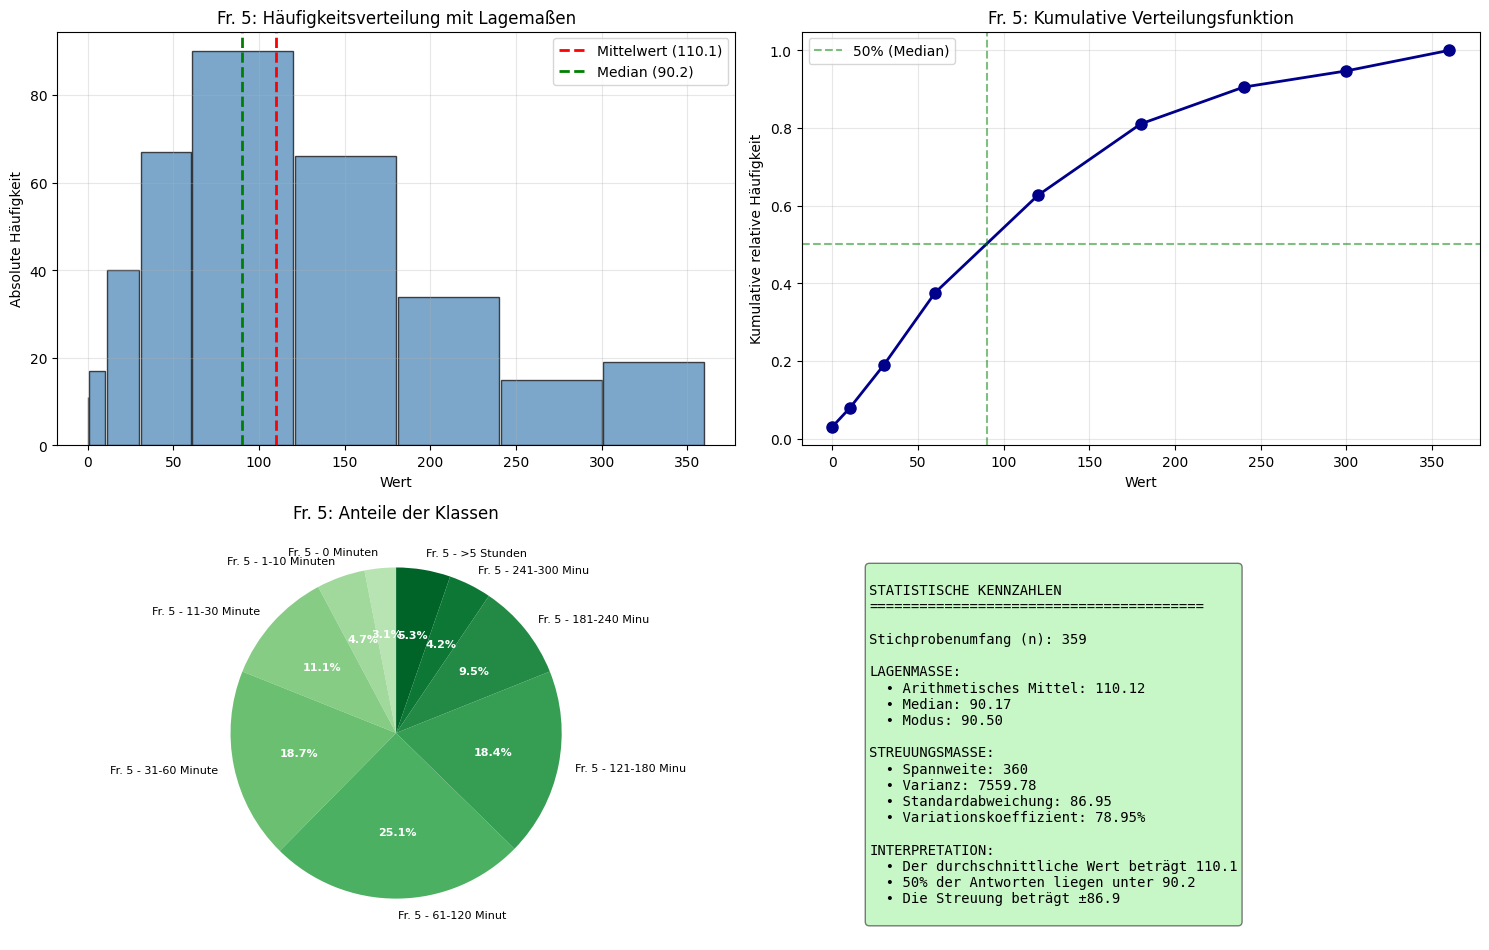


Visualisierung erstellt!


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Histogramm (Häufigkeitsverteilung)
ax1 = axes[0, 0]
ax1.bar(fr5_data_sorted['Klassenmitte'], fr5_data_sorted['Value'], 
        width=fr5_data_sorted['Obere_Grenze'] - fr5_data_sorted['Untere_Grenze'],
        edgecolor='black', alpha=0.7, color='steelblue')
ax1.axvline(mean_grouped_fr5, color='red', linestyle='--', linewidth=2, 
            label=f'Mittelwert ({mean_grouped_fr5:.1f})')
ax1.axvline(median_grouped_fr5, color='green', linestyle='--', linewidth=2, 
            label=f'Median ({median_grouped_fr5:.1f})')
ax1.set_xlabel('Wert')
ax1.set_ylabel('Absolute Häufigkeit')
ax1.set_title('Fr. 5: Häufigkeitsverteilung mit Lagemaßen')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Kumulative Verteilung
ax2 = axes[0, 1]
ax2.plot(fr5_data_sorted['Obere_Grenze'], fr5_data_sorted['Kum_Rel_Haeufigkeit'], 
         marker='o', linewidth=2, markersize=8, color='darkblue')
ax2.axhline(0.5, color='green', linestyle='--', alpha=0.5, label='50% (Median)')
ax2.axvline(median_grouped_fr5, color='green', linestyle='--', alpha=0.5)
ax2.set_xlabel('Wert')
ax2.set_ylabel('Kumulative relative Häufigkeit')
ax2.set_title('Fr. 5: Kumulative Verteilungsfunktion')
ax2.grid(True, alpha=0.3)
ax2.legend()

# 3. Relative Häufigkeiten (Kreisdiagramm)
ax3 = axes[1, 0]
colors = plt.cm.Greens(np.linspace(0.3, 0.9, len(fr5_data_sorted)))
wedges, texts, autotexts = ax3.pie(fr5_data_sorted['Value'], 
                                     labels=fr5_data_sorted['Question'].str[:20],
                                     autopct='%1.1f%%',
                                     colors=colors,
                                     startangle=90)
ax3.set_title('Fr. 5: Anteile der Klassen')
for text in texts:
    text.set_fontsize(8)
for autotext in autotexts:
    autotext.set_fontsize(8)
    autotext.set_color('white')
    autotext.set_weight('bold')

# 4. Kennzahlen
ax4 = axes[1, 1]
ax4.axis('off')

# Erstelle Textbox mit Kennzahlen
kennzahlen_text_fr5 = f"""
STATISTISCHE KENNZAHLEN
{'='*40}

Stichprobenumfang (n): {n_fr5:.0f}

LAGENMASSE:
  • Arithmetisches Mittel: {mean_grouped_fr5:.2f}
  • Median: {median_grouped_fr5:.2f}
  • Modus: {mode_grouped_fr5:.2f}

STREUUNGSMASSE:
  • Spannweite: {fr5_data_sorted['Obere_Grenze'].max() - fr5_data_sorted['Untere_Grenze'].min():.0f}
  • Varianz: {variance_grouped_fr5:.2f}
  • Standardabweichung: {std_grouped_fr5:.2f}
  • Variationskoeffizient: {(std_grouped_fr5/mean_grouped_fr5)*100:.2f}%

INTERPRETATION:
  • Der durchschnittliche Wert beträgt {mean_grouped_fr5:.1f}
  • 50% der Antworten liegen unter {median_grouped_fr5:.1f}
  • Die Streuung beträgt ±{std_grouped_fr5:.1f}
"""

ax4.text(0.1, 0.9, kennzahlen_text_fr5, transform=ax4.transAxes,
         fontsize=10, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))

plt.tight_layout()
plt.show()

print("\nVisualisierung erstellt!")

In [ ]:
# Speichere die berechneten Werte für Frage 5
fr5_stats = {
    'n': n_fr5,
    'mean': mean_grouped_fr5,
    'median': median_grouped_fr5,
    'mode': mode_grouped_fr5,
    'std': std_grouped_fr5,
    'variance': variance_grouped_fr5,
    'cv': (std_grouped_fr5/mean_grouped_fr5)*100
}

print("Frage 5 Statistiken gespeichert in 'fr5_stats' Dictionary")
print(fr5_stats)

### Vergleich: Frage 3 vs. Frage 5

In [ ]:
# Vergleichstabelle erstellen
comparison_df = pd.DataFrame({
    'Kennzahl': ['Stichprobenumfang (n)', 'Mittelwert', 'Median', 'Modus', 
                 'Standardabweichung', 'Varianz', 'Variationskoeffizient (%)'],
    'Frage 3': [fr3_stats['n'], fr3_stats['mean'], fr3_stats['median'], 
                fr3_stats['mode'], fr3_stats['std'], fr3_stats['variance'], 
                fr3_stats['cv']],
    'Frage 5': [fr5_stats['n'], fr5_stats['mean'], fr5_stats['median'], 
                fr5_stats['mode'], fr5_stats['std'], fr5_stats['variance'], 
                fr5_stats['cv']]
})

print("="*80)
print("VERGLEICH: FRAGE 3 vs. FRAGE 5")
print("="*80)
comparison_df.round(2)

NameError: name 'fr3_stats' is not defined

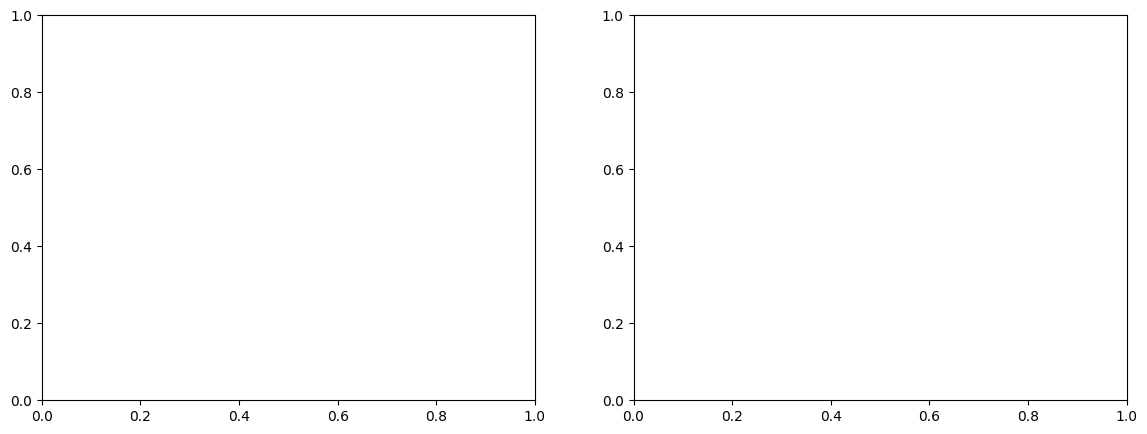

In [79]:
# Vergleichsvisualisierung
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Vergleich der Lagemaße
ax1 = axes[0]
x = np.arange(3)
width = 0.35
measures = ['Mittelwert', 'Median', 'Modus']
fr3_values = [fr3_stats['mean'], fr3_stats['median'], fr3_stats['mode']]
fr5_values = [fr5_stats['mean'], fr5_stats['median'], fr5_stats['mode']]

bars1 = ax1.bar(x - width/2, fr3_values, width, label='Frage 3', color='steelblue')
bars2 = ax1.bar(x + width/2, fr5_values, width, label='Frage 5', color='seagreen')

ax1.set_xlabel('Lagemaße')
ax1.set_ylabel('Wert')
ax1.set_title('Vergleich der Lagemaße')
ax1.set_xticks(x)
ax1.set_xticklabels(measures)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Füge Werte auf den Balken hinzu
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', fontsize=9)

# Vergleich der Streuungsmaße
ax2 = axes[1]
x2 = np.arange(2)
measures2 = ['Standardabw.', 'Var.koeff. (%)']
fr3_values2 = [fr3_stats['std'], fr3_stats['cv']]
fr5_values2 = [fr5_stats['std'], fr5_stats['cv']]

bars3 = ax2.bar(x2 - width/2, fr3_values2, width, label='Frage 3', color='steelblue')
bars4 = ax2.bar(x2 + width/2, fr5_values2, width, label='Frage 5', color='seagreen')

ax2.set_xlabel('Streuungsmaße')
ax2.set_ylabel('Wert')
ax2.set_title('Vergleich der Streuungsmaße')
ax2.set_xticks(x2)
ax2.set_xticklabels(measures2)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# Füge Werte auf den Balken hinzu
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\nVergleichsvisualisierung erstellt!")

In [35]:
from scipy import stats

# T-Test zur Messung der Signifikanz eines Mittelwerts
# (Einstichproben-t-Test gegen einen Vergleichswert)


# Definiere die Parameter
mittelwert = 17.9  # Stichproben-Mittelwert
standardabweichung = 30.8  # Stichproben-Standardabweichung
stichprobengroesse = 197  # Anzahl der Beobachtungen
vergleichswert = 0  # Hypothetischer Wert zum Vergleich (z.B. 60 Minuten)

# Berechne den Standardfehler
standardfehler = standardabweichung / np.sqrt(stichprobengroesse)

# Berechne die t-Statistik
t_statistik = (mittelwert - vergleichswert) / standardfehler

# Berechne die Freiheitsgrade
freiheitsgrade = stichprobengroesse - 1

# Berechne den p-Wert (zweiseitiger Test)
p_wert = 2 * (1 - stats.t.cdf(abs(t_statistik), freiheitsgrade))

# Ausgabe
print("="*80)
print("T-TEST: SIGNIFIKANZ DES MITTELWERTS")
print("="*80)
print(f"\nStichprobenparameter:")
print(f"  • Mittelwert: {mittelwert:.2f}")
print(f"  • Standardabweichung: {standardabweichung:.2f}")
print(f"  • Stichprobengröße: {stichprobengroesse:.0f}")
print(f"  • Vergleichswert (μ₀): {vergleichswert}")
print(f"\nTeststatistiken:")
print(f"  • Standardfehler: {standardfehler:.4f}")
print(f"  • t-Statistik: {t_statistik:.4f}")
print(f"  • Freiheitsgrade: {freiheitsgrade:.0f}")
print(f"  • p-Wert: {p_wert:.6f}")
print(f"\nInterpretation (α = 0.05):")
if p_wert < 0.05:
    print(f"  ✓ Der Mittelwert ({mittelwert:.2f}) unterscheidet sich SIGNIFIKANT vom Vergleichswert ({vergleichswert})")
else:
    print(f"  ✗ Der Mittelwert ({mittelwert:.2f}) unterscheidet sich NICHT SIGNIFIKANT vom Vergleichswert ({vergleichswert})")

T-TEST: SIGNIFIKANZ DES MITTELWERTS

Stichprobenparameter:
  • Mittelwert: 17.90
  • Standardabweichung: 30.80
  • Stichprobengröße: 197
  • Vergleichswert (μ₀): 0

Teststatistiken:
  • Standardfehler: 2.1944
  • t-Statistik: 8.1571
  • Freiheitsgrade: 196
  • p-Wert: 0.000000

Interpretation (α = 0.05):
  ✓ Der Mittelwert (17.90) unterscheidet sich SIGNIFIKANT vom Vergleichswert (0)


In [36]:
# Extrahiere Frage 6 Daten
fr6_data = table_0_transposed[table_0_transposed['Question_Number'] == 'Fr. 6'].copy()

print("Frage 6 - Rohdaten:")
print(fr6_data[['Question', 'Value', 'Relative_Value']])

Frage 6 - Rohdaten:
                                              Question  Value  Relative_Value
100                   Fr. 6 - Copilot Chat - 0 Minuten   15.0        0.041783
101                Fr. 6 - Copilot Chat - 1-10 Minuten   51.0        0.142061
102               Fr. 6 - Copilot Chat - 11-30 Minuten   93.0        0.259053
103               Fr. 6 - Copilot Chat - 31-60 Minuten   88.0        0.245125
104              Fr. 6 - Copilot Chat - 61-120 Minuten   45.0        0.125348
105                  Fr. 6 - Copilot Chat - >2 Stunden   47.0        0.130919
106                           Fr. 6 - Word - 0 Minuten   39.0        0.108635
107                        Fr. 6 - Word - 1-10 Minuten   72.0        0.200557
108                       Fr. 6 - Word - 11-30 Minuten   62.0        0.172702
109                       Fr. 6 - Word - 31-60 Minuten   16.0        0.044568
110                      Fr. 6 - Word - 61-120 Minuten    2.0        0.005571
111                          Fr. 6 - Word - 

In [39]:
# Extrahiere Klassengrenzen für Frage 6 mit verbesserter Logik
import re

# Kopiere die Daten, um mehrfache Kategorien zu unterstützen
fr6_data['Kategorie'] = ''
fr6_data['Untere_Grenze'] = 0
fr6_data['Obere_Grenze'] = 0

print("Verarbeite Frage 6 - Klassenbildung:")
print("="*80)

for idx, row in fr6_data.iterrows():
    question = row['Question']
    
    # Debug: Zeige die Frage
    print(f"Verarbeite: {question}")
    
    # Extrahiere Kategorie und Zeitangabe
    # Format: "Fr. 6 - [Kategorie] - [Zeitangabe]"
    parts = question.split(' - ')
    
    if len(parts) >= 3:
        # Extrahiere Kategorie (Teil zwischen "Fr. 6" und Zeitangabe)
        kategorie = parts[1].strip()
        fr6_data.at[idx, 'Kategorie'] = kategorie
        
        # Extrahiere Zeitangabe (letzter Teil)
        zeitangabe = parts[-1].strip()
        
        # Spezialfälle zuerst prüfen
        # ">2 Stunden" oder ähnlich
        if '>2' in zeitangabe and ('stunden' in zeitangabe.lower() or 'std' in zeitangabe.lower()):
            fr6_data.at[idx, 'Untere_Grenze'] = 121
            fr6_data.at[idx, 'Obere_Grenze'] = 180
            print(f"  -> {kategorie}: >2 Std = 121-180")
        
        # "0 Minuten" (Sonderfall)
        elif re.match(r'^\s*0\s+minuten', zeitangabe, re.IGNORECASE):
            fr6_data.at[idx, 'Untere_Grenze'] = 0
            fr6_data.at[idx, 'Obere_Grenze'] = 0
            print(f"  -> {kategorie}: 0 Minuten = 0-0")
        
        # "X-Y Minuten" Format (z.B. "1-10 Minuten", "61-120 Minuten")
        elif re.search(r'(\d+)\s*-\s*(\d+)\s+minuten', zeitangabe, re.IGNORECASE):
            match = re.search(r'(\d+)\s*-\s*(\d+)\s+minuten', zeitangabe, re.IGNORECASE)
            lower = int(match.group(1))
            upper = int(match.group(2))
            fr6_data.at[idx, 'Untere_Grenze'] = lower
            fr6_data.at[idx, 'Obere_Grenze'] = upper
            print(f"  -> {kategorie}: {lower}-{upper}")
        
        # "bis X Minuten" oder "unter X Minuten"
        elif 'bis' in zeitangabe.lower() or 'unter' in zeitangabe.lower():
            match = re.search(r'(\d+)', zeitangabe)
            if match:
                upper = int(match.group(1))
                fr6_data.at[idx, 'Untere_Grenze'] = 0
                fr6_data.at[idx, 'Obere_Grenze'] = upper
                print(f"  -> {kategorie}: bis {upper} = 0-{upper}")
        
        # "über X Minuten" oder "mehr als X Minuten"
        elif 'über' in zeitangabe.lower() or 'mehr als' in zeitangabe.lower():
            match = re.search(r'(\d+)', zeitangabe)
            if match:
                lower = int(match.group(1))
                # Annahme: offenes Intervall, +60 für Schätzung
                fr6_data.at[idx, 'Untere_Grenze'] = lower
                fr6_data.at[idx, 'Obere_Grenze'] = lower + 60
                print(f"  -> {kategorie}: über {lower} = {lower}-{lower+60}")
        
        else:
            print(f"  -> {kategorie}: WARNUNG - Keine Regel passt!")
    else:
        print(f"  -> FEHLER: Unerwartetes Format!")

# Berechne Klassenmittelwert
fr6_data['Klassenmitte'] = (fr6_data['Untere_Grenze'] + fr6_data['Obere_Grenze']) / 2

print("\n" + "="*80)
print("Frage 6 - Mit Klassengrenzen (korrigiert):")
print("="*80)
fr6_data[['Question', 'Kategorie', 'Value', 'Untere_Grenze', 'Obere_Grenze', 'Klassenmitte']].head(15)

Verarbeite Frage 6 - Klassenbildung:
Verarbeite: Fr. 6 - Copilot Chat - 0 Minuten
  -> Copilot Chat: 0 Minuten = 0-0
Verarbeite: Fr. 6 - Copilot Chat - 1-10 Minuten
  -> Copilot Chat: 1-10
Verarbeite: Fr. 6 - Copilot Chat - 11-30 Minuten
  -> Copilot Chat: 11-30
Verarbeite: Fr. 6 - Copilot Chat - 31-60 Minuten
  -> Copilot Chat: 31-60
Verarbeite: Fr. 6 - Copilot Chat - 61-120 Minuten
  -> Copilot Chat: 61-120
Verarbeite: Fr. 6 - Copilot Chat - >2 Stunden
  -> Copilot Chat: >2 Std = 121-180
Verarbeite: Fr. 6 - Word - 0 Minuten
  -> Word: 0 Minuten = 0-0
Verarbeite: Fr. 6 - Word - 1-10 Minuten
  -> Word: 1-10
Verarbeite: Fr. 6 - Word - 11-30 Minuten
  -> Word: 11-30
Verarbeite: Fr. 6 - Word - 31-60 Minuten
  -> Word: 31-60
Verarbeite: Fr. 6 - Word - 61-120 Minuten
  -> Word: 61-120
Verarbeite: Fr. 6 - Word - >2 Stunden
  -> Word: >2 Std = 121-180
Verarbeite: Fr. 6 - PowerPoint - 0 Minuten
  -> PowerPoint: 0 Minuten = 0-0
Verarbeite: Fr. 6 - PowerPoint - 1-10 Minuten
  -> PowerPoint: 1-10

,Question,Kategorie,Value,Untere_Grenze,Obere_Grenze,Klassenmitte
100,Fr. 6 - Copilot Chat - 0 Minuten,Copilot Chat,15.0,0,0,0.0
101,Fr. 6 - Copilot Chat - 1-10 Minuten,Copilot Chat,51.0,1,10,5.5
102,Fr. 6 - Copilot Chat - 11-30 Minuten,Copilot Chat,93.0,11,30,20.5
103,Fr. 6 - Copilot Chat - 31-60 Minuten,Copilot Chat,88.0,31,60,45.5
104,Fr. 6 - Copilot Chat - 61-120 Minuten,Copilot Chat,45.0,61,120,90.5
105,Fr. 6 - Copilot Chat - >2 Stunden,Copilot Chat,47.0,121,180,150.5
106,Fr. 6 - Word - 0 Minuten,Word,39.0,0,0,0.0
107,Fr. 6 - Word - 1-10 Minuten,Word,72.0,1,10,5.5
108,Fr. 6 - Word - 11-30 Minuten,Word,62.0,11,30,20.5
109,Fr. 6 - Word - 31-60 Minuten,Word,16.0,31,60,45.5


In [40]:
# Berechnung statistischer Kennzahlen für Frage 6 (klassierte Daten)
# Da Frage 6 mehrere Kategorien hat, berechnen wir die Statistiken für jede Kategorie

fr6_stats_dict = {}

print("="*80)
print("STATISTISCHE KENNZAHLEN FÜR FRAGE 6 (KLASSIERTE DATEN)")
print("="*80)

# Iteriere über alle Kategorien
for kategorie in fr6_data['Kategorie'].unique():
    kategorie_data = fr6_data[fr6_data['Kategorie'] == kategorie].copy()
    
    # Gesamtanzahl der Beobachtungen für diese Kategorie
    n = kategorie_data['Value'].sum()
    
    # 1. ARITHMETISCHES MITTEL (gewichteter Mittelwert)
    mean_grouped = (kategorie_data['Klassenmitte'] * kategorie_data['Value']).sum() / n
    
    # 2. MEDIAN (Median-Klasse bestimmen)
    # Kumulative Häufigkeiten
    kategorie_data_sorted = kategorie_data.sort_values('Klassenmitte').reset_index(drop=True)
    kategorie_data_sorted['Kum_Haeufigkeit'] = kategorie_data_sorted['Value'].cumsum()
    kategorie_data_sorted['Kum_Rel_Haeufigkeit'] = kategorie_data_sorted['Kum_Haeufigkeit'] / n
    
    # Finde Median-Klasse (erste Klasse mit kumulativer Häufigkeit >= 50%)
    median_class_idx = kategorie_data_sorted[kategorie_data_sorted['Kum_Rel_Haeufigkeit'] >= 0.5].index[0]
    median_class = kategorie_data_sorted.iloc[median_class_idx]
    
    # Lineare Interpolation für Median
    if median_class_idx == 0:
        h_prev = 0
    else:
        h_prev = kategorie_data_sorted.iloc[median_class_idx - 1]['Kum_Haeufigkeit']
    
    L = median_class['Untere_Grenze']
    h = median_class['Value']
    b = median_class['Obere_Grenze'] - median_class['Untere_Grenze']
    
    if b > 0:
        median_grouped = L + ((n/2 - h_prev) / h) * b
    else:
        median_grouped = L
    
    # 3. STANDARDABWEICHUNG
    variance_grouped = ((kategorie_data['Klassenmitte'] - mean_grouped)**2 * kategorie_data['Value']).sum() / n
    std_grouped = np.sqrt(variance_grouped)
    
    # 4. MODUS (Klasse mit höchster Häufigkeit)
    mode_class = kategorie_data.loc[kategorie_data['Value'].idxmax()]
    mode_grouped = mode_class['Klassenmitte']
    
    # Speichere Statistiken
    fr6_stats_dict[kategorie] = {
        'n': n,
        'mean': mean_grouped,
        'median': median_grouped,
        'mode': mode_grouped,
        'std': std_grouped,
        'variance': variance_grouped,
        'cv': (std_grouped/mean_grouped)*100 if mean_grouped > 0 else 0
    }
    
    # Ausgabe
    print(f"\n{'─'*80}")
    print(f"KATEGORIE: {kategorie}")
    print(f"{'─'*80}")
    print(f"Gesamtanzahl Antworten: {n:.0f}")
    print(f"\n--- Lagemaße ---")
    print(f"Arithmetisches Mittel: {mean_grouped:.2f} Minuten")
    print(f"Median (interpoliert): {median_grouped:.2f} Minuten")
    print(f"Modus (Klassenmitte): {mode_grouped:.2f} Minuten")
    print(f"\n--- Streuungsmaße ---")
    print(f"Varianz: {variance_grouped:.2f}")
    print(f"Standardabweichung: {std_grouped:.2f} Minuten")
    print(f"Variationskoeffizient: {(std_grouped/mean_grouped)*100 if mean_grouped > 0 else 0:.2f}%")

print("\n" + "="*80)
print("Frage 6 Statistiken gespeichert in 'fr6_stats_dict' Dictionary")
print("="*80)

STATISTISCHE KENNZAHLEN FÜR FRAGE 6 (KLASSIERTE DATEN)

────────────────────────────────────────────────────────────────────────────────
KATEGORIE: Copilot Chat
────────────────────────────────────────────────────────────────────────────────
Gesamtanzahl Antworten: 339

--- Lagemaße ---
Arithmetisches Mittel: 51.14 Minuten
Median (interpoliert): 34.46 Minuten
Modus (Klassenmitte): 20.50 Minuten

--- Streuungsmaße ---
Varianz: 2269.29
Standardabweichung: 47.64 Minuten
Variationskoeffizient: 93.15%

────────────────────────────────────────────────────────────────────────────────
KATEGORIE: Word
────────────────────────────────────────────────────────────────────────────────
Gesamtanzahl Antworten: 192

--- Lagemaße ---
Arithmetisches Mittel: 14.20 Minuten
Median (interpoliert): 8.12 Minuten
Modus (Klassenmitte): 5.50 Minuten

--- Streuungsmaße ---
Varianz: 321.20
Standardabweichung: 17.92 Minuten
Variationskoeffizient: 126.21%

────────────────────────────────────────────────────────────

In [41]:
# Erstelle Vergleichstabelle für alle Kategorien von Frage 6
fr6_comparison_df = pd.DataFrame(fr6_stats_dict).T

# Runde die Werte
fr6_comparison_df = fr6_comparison_df.round(2)

# Sortiere nach Mittelwert (absteigend)
fr6_comparison_df = fr6_comparison_df.sort_values('mean', ascending=False)

print("="*80)
print("VERGLEICH ALLER KATEGORIEN - FRAGE 6")
print("="*80)
print("\nSortiert nach durchschnittlicher Zeit (Mittelwert):")
fr6_comparison_df

VERGLEICH ALLER KATEGORIEN - FRAGE 6

Sortiert nach durchschnittlicher Zeit (Mittelwert):


,n,mean,median,mode,std,variance,cv
Copilot Chat,339.0,51.14,34.46,20.5,47.64,2269.29,93.15
Outlook,306.0,26.59,16.20,20.5,32.02,1025.39,120.41
"Teams, ohne Copilot Chat",316.0,22.94,9.20,5.5,32.74,1071.69,142.69
Excel,208.0,20.25,8.81,5.5,28.65,820.66,141.48
sonstige,196.0,17.92,6.23,0.0,30.81,949.36,171.96
PowerPoint,215.0,17.70,7.66,5.5,26.44,699.06,149.34
Word,192.0,14.20,8.12,5.5,17.92,321.20,126.21


### Visualisierung: Frage 6 - Kategorienvergleich

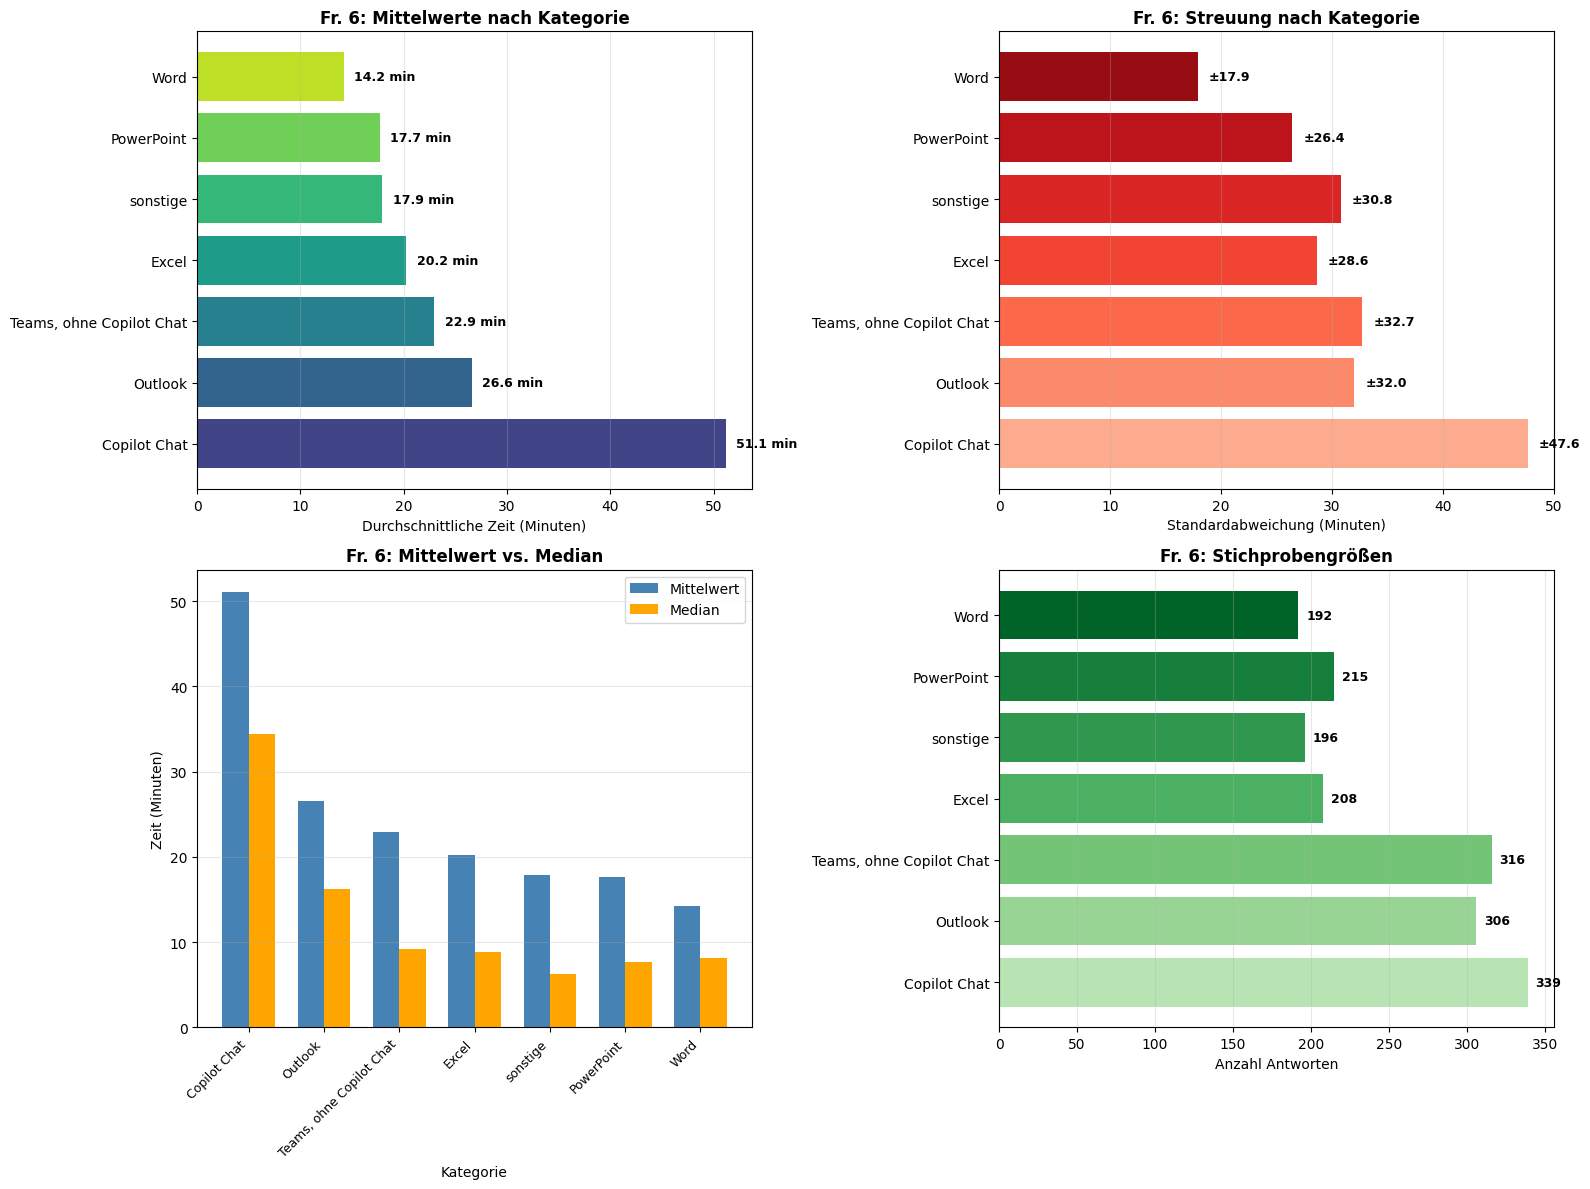


Visualisierung erstellt!


In [42]:
# Visualisierung für Frage 6 - Vergleich aller Kategorien
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Vergleich der Mittelwerte
ax1 = axes[0, 0]
categories = fr6_comparison_df.index
means = fr6_comparison_df['mean']
colors_mean = plt.cm.viridis(np.linspace(0.2, 0.9, len(categories)))

bars1 = ax1.barh(categories, means, color=colors_mean)
ax1.set_xlabel('Durchschnittliche Zeit (Minuten)')
ax1.set_title('Fr. 6: Mittelwerte nach Kategorie', fontweight='bold', fontsize=12)
ax1.grid(True, alpha=0.3, axis='x')

# Füge Werte hinzu
for i, (bar, val) in enumerate(zip(bars1, means)):
    width = bar.get_width()
    ax1.text(width + 1, bar.get_y() + bar.get_height()/2.,
            f'{val:.1f} min',
            ha='left', va='center', fontsize=9, fontweight='bold')

# 2. Vergleich der Streuung (Standardabweichung)
ax2 = axes[0, 1]
stds = fr6_comparison_df['std']
colors_std = plt.cm.Reds(np.linspace(0.3, 0.9, len(categories)))

bars2 = ax2.barh(categories, stds, color=colors_std)
ax2.set_xlabel('Standardabweichung (Minuten)')
ax2.set_title('Fr. 6: Streuung nach Kategorie', fontweight='bold', fontsize=12)
ax2.grid(True, alpha=0.3, axis='x')

# Füge Werte hinzu
for i, (bar, val) in enumerate(zip(bars2, stds)):
    width = bar.get_width()
    ax2.text(width + 1, bar.get_y() + bar.get_height()/2.,
            f'±{val:.1f}',
            ha='left', va='center', fontsize=9, fontweight='bold')

# 3. Vergleich Mittelwert vs. Median
ax3 = axes[1, 0]
x = np.arange(len(categories))
width = 0.35

means_plot = fr6_comparison_df['mean']
medians = fr6_comparison_df['median']

bars3 = ax3.bar(x - width/2, means_plot, width, label='Mittelwert', color='steelblue')
bars4 = ax3.bar(x + width/2, medians, width, label='Median', color='orange')

ax3.set_xlabel('Kategorie')
ax3.set_ylabel('Zeit (Minuten)')
ax3.set_title('Fr. 6: Mittelwert vs. Median', fontweight='bold', fontsize=12)
ax3.set_xticks(x)
ax3.set_xticklabels(categories, rotation=45, ha='right', fontsize=9)
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# 4. Stichprobengrößen
ax4 = axes[1, 1]
sample_sizes = fr6_comparison_df['n']
colors_n = plt.cm.Greens(np.linspace(0.3, 0.9, len(categories)))

bars5 = ax4.barh(categories, sample_sizes, color=colors_n)
ax4.set_xlabel('Anzahl Antworten')
ax4.set_title('Fr. 6: Stichprobengrößen', fontweight='bold', fontsize=12)
ax4.grid(True, alpha=0.3, axis='x')

# Füge Werte hinzu
for i, (bar, val) in enumerate(zip(bars5, sample_sizes)):
    width = bar.get_width()
    ax4.text(width + 5, bar.get_y() + bar.get_height()/2.,
            f'{val:.0f}',
            ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nVisualisierung erstellt!")

### Detaillierte Verteilung pro Kategorie

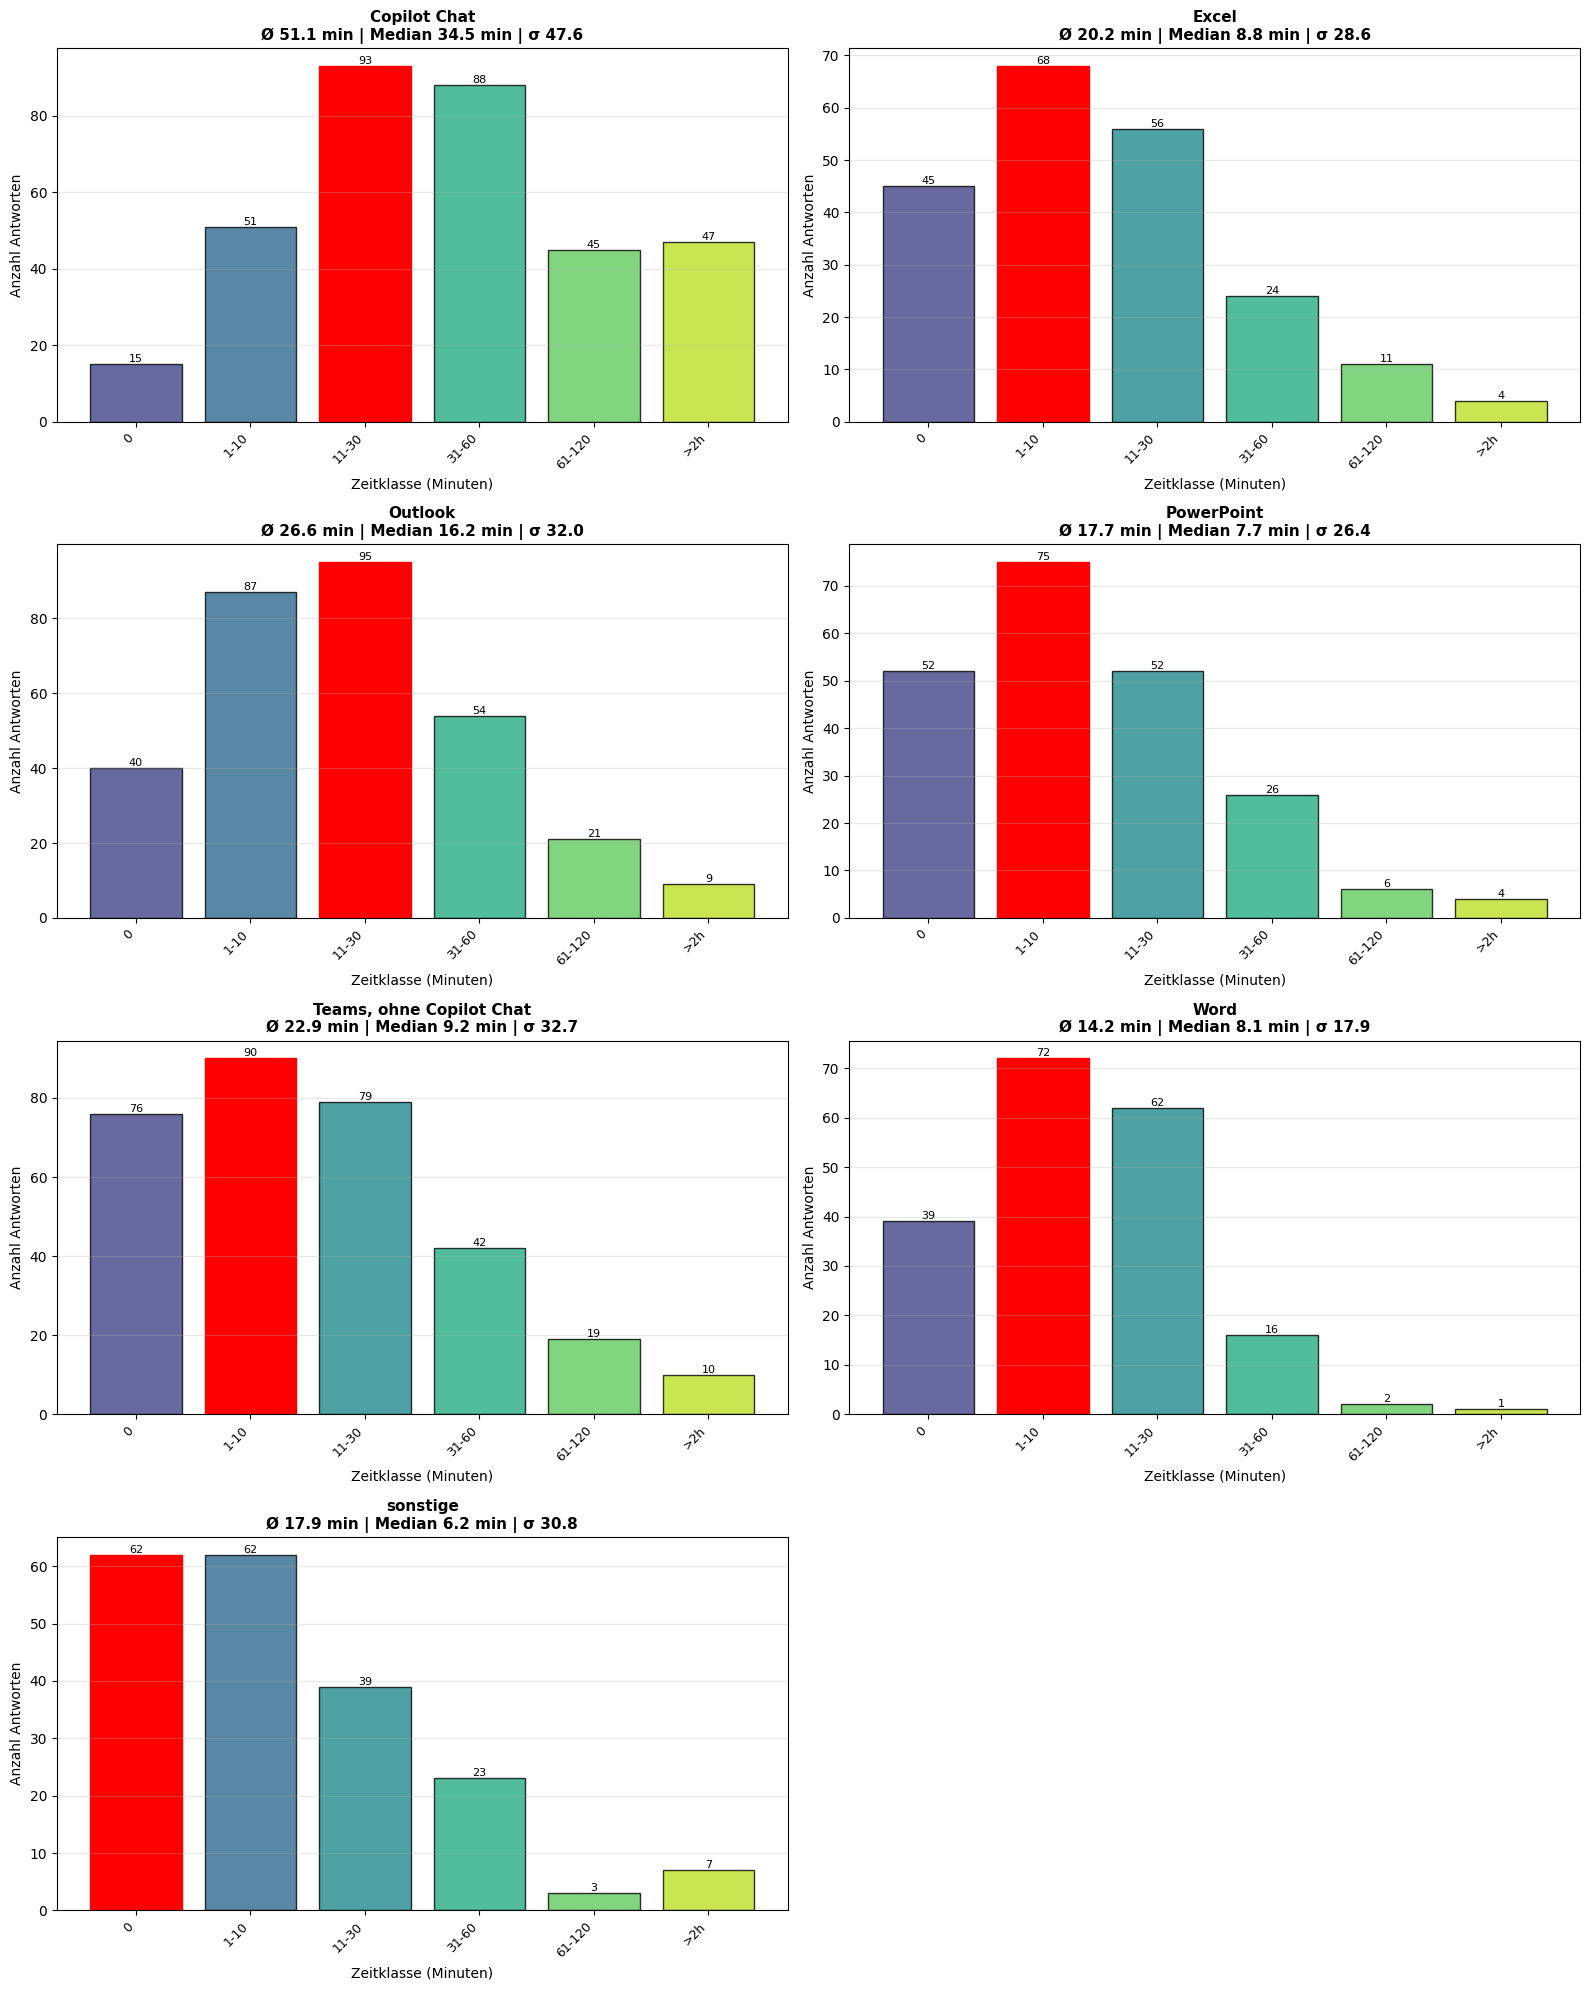


Detaillierte Verteilungen pro Kategorie erstellt!


In [44]:
# Detaillierte Visualisierung für jede Kategorie
import matplotlib.pyplot as plt
import seaborn as sns

# Anzahl der Kategorien
categories = fr6_data['Kategorie'].unique()
n_categories = len(categories)

# Erstelle Subplots (2 Spalten)
n_cols = 2
n_rows = (n_categories + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
axes = axes.flatten() if n_categories > 1 else [axes]

for idx, kategorie in enumerate(sorted(categories)):
    kategorie_data = fr6_data[fr6_data['Kategorie'] == kategorie].copy()
    kategorie_data = kategorie_data.sort_values('Klassenmitte')
    
    ax = axes[idx]
    
    # Erstelle Balkendiagramm
    colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(kategorie_data)))
    bars = ax.bar(range(len(kategorie_data)), kategorie_data['Value'], color=colors, edgecolor='black', alpha=0.8)
    
    # Markiere die Klasse mit der höchsten Häufigkeit
    max_idx = kategorie_data['Value'].idxmax()
    max_pos = list(kategorie_data.index).index(max_idx)
    bars[max_pos].set_color('red')
    bars[max_pos].set_alpha(1.0)
    
    # Setze x-Labels (Zeitklassen)
    zeitklassen = []
    for _, row in kategorie_data.iterrows():
        if row['Untere_Grenze'] == 0 and row['Obere_Grenze'] == 0:
            zeitklassen.append('0')
        elif row['Obere_Grenze'] == 180 and row['Untere_Grenze'] == 121:
            zeitklassen.append('>2h')
        else:
            zeitklassen.append(f"{int(row['Untere_Grenze'])}-{int(row['Obere_Grenze'])}")
    
    ax.set_xticks(range(len(kategorie_data)))
    ax.set_xticklabels(zeitklassen, rotation=45, ha='right', fontsize=9)
    ax.set_xlabel('Zeitklasse (Minuten)')
    ax.set_ylabel('Anzahl Antworten')
    
    # Hole Statistiken
    stats = fr6_stats_dict[kategorie]
    ax.set_title(f'{kategorie}\n'
                f'Ø {stats["mean"]:.1f} min | Median {stats["median"]:.1f} min | σ {stats["std"]:.1f}',
                fontweight='bold', fontsize=11)
    
    ax.grid(True, alpha=0.3, axis='y')
    
    # Füge Werte auf den Balken hinzu
    for i, (bar, val) in enumerate(zip(bars, kategorie_data['Value'])):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
               f'{int(val)}',
               ha='center', va='bottom', fontsize=8)

# Verstecke leere Subplots
for idx in range(n_categories, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

print("\nDetaillierte Verteilungen pro Kategorie erstellt!")

### Zusammenfassung der Erkenntnisse - Frage 6

In [45]:
# Zusammenfassung der wichtigsten Erkenntnisse für Frage 6
print("="*80)
print("ZUSAMMENFASSUNG - FRAGE 6: ZEITAUFWAND PRO ANWENDUNG")
print("="*80)

print("\n1. RANKING NACH DURCHSCHNITTLICHEM ZEITAUFWAND:")
print("-" * 80)
for i, (kategorie, row) in enumerate(fr6_comparison_df.iterrows(), 1):
    print(f"  {i}. {kategorie:30s} - Ø {row['mean']:5.1f} min (Median: {row['median']:5.1f} min)")

print("\n2. NUTZUNGSINTENSITÄT (Stichprobengröße):")
print("-" * 80)
for i, (kategorie, row) in enumerate(fr6_comparison_df.sort_values('n', ascending=False).iterrows(), 1):
    print(f"  {i}. {kategorie:30s} - {row['n']:3.0f} Antworten")

print("\n3. STREUUNG/VARIABILITÄT:")
print("-" * 80)
for i, (kategorie, row) in enumerate(fr6_comparison_df.sort_values('cv', ascending=False).iterrows(), 1):
    print(f"  {i}. {kategorie:30s} - CV: {row['cv']:6.2f}% (σ = {row['std']:5.1f} min)")

print("\n4. WICHTIGSTE ERKENNTNISSE:")
print("-" * 80)

# Finde die Kategorie mit höchstem Zeitaufwand
max_time_cat = fr6_comparison_df['mean'].idxmax()
max_time_val = fr6_comparison_df.loc[max_time_cat, 'mean']

# Finde die Kategorie mit geringstem Zeitaufwand
min_time_cat = fr6_comparison_df['mean'].idxmin()
min_time_val = fr6_comparison_df.loc[min_time_cat, 'mean']

# Finde die Kategorie mit höchster Nutzung
max_usage_cat = fr6_comparison_df['n'].idxmax()
max_usage_val = fr6_comparison_df.loc[max_usage_cat, 'n']

print(f"""
  • Höchster Zeitaufwand: {max_time_cat} ({max_time_val:.1f} min/Tag)
  • Geringster Zeitaufwand: {min_time_cat} ({min_time_val:.1f} min/Tag)
  • Meist genutzte Anwendung: {max_usage_cat} ({max_usage_val:.0f} Antworten)
  
  • Copilot Chat weist den mit Abstand höchsten Zeitaufwand auf
  • Office-Anwendungen (Word, Excel, PowerPoint) haben ähnliche, 
    moderate Zeitaufwände (14-20 min)
  • Hohe Variabilität bei allen Kategorien deutet auf unterschiedliche 
    Nutzungsmuster hin
""")

ZUSAMMENFASSUNG - FRAGE 6: ZEITAUFWAND PRO ANWENDUNG

1. RANKING NACH DURCHSCHNITTLICHEM ZEITAUFWAND:
--------------------------------------------------------------------------------
  1. Copilot Chat                   - Ø  51.1 min (Median:  34.5 min)
  2. Outlook                        - Ø  26.6 min (Median:  16.2 min)
  3. Teams, ohne Copilot Chat       - Ø  22.9 min (Median:   9.2 min)
  4. Excel                          - Ø  20.2 min (Median:   8.8 min)
  5. sonstige                       - Ø  17.9 min (Median:   6.2 min)
  6. PowerPoint                     - Ø  17.7 min (Median:   7.7 min)
  7. Word                           - Ø  14.2 min (Median:   8.1 min)

2. NUTZUNGSINTENSITÄT (Stichprobengröße):
--------------------------------------------------------------------------------
  1. Copilot Chat                   - 339 Antworten
  2. Teams, ohne Copilot Chat       - 316 Antworten
  3. Outlook                        - 306 Antworten
  4. PowerPoint                     - 215 Antwo

## Hier Analyse